## Load Datasets

First dataset

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wadhasnalhamdan/date-fruit-image-dataset-in-controlled-environment

Dataset URL: https://www.kaggle.com/datasets/wadhasnalhamdan/date-fruit-image-dataset-in-controlled-environment
License(s): Attribution 4.0 International (CC BY 4.0)
100% 3.10G/3.11G [00:16<00:00, 197MB/s]
100% 3.11G/3.11G [00:17<00:00, 197MB/s]


In [ ]:
!unzip -q date-fruit-image-dataset-in-controlled-environment.zip -d date_dataset

In [ ]:
# prompt: data distribution form datase in subfolder

import os
import pandas as pd

# Get the path to the date_dataset directory
data_dir = os.path.join(os.getcwd(), 'date_dataset')

# Get a list of all the subfolders in the data_dataset directory
subfolders = [f.path for f in os.scandir(data_dir) if f.is_dir()]

# Create an empty dictionary to store the data distribution
data_distribution = {}

# Loop through each subfolder
for subfolder in subfolders:
  # Get the name of the subfolder
  folder_name = os.path.basename(subfolder)

  # Get a list of all the files in the subfolder
  files = [f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f))]

  # Get the number of files in the subfolder
  num_files = len(files)

  # Add the subfolder name and number of files to the data distribution dictionary
  data_distribution[folder_name] = num_files

# Convert the data distribution dictionary to a Pandas DataFrame
df_data_distribution = pd.DataFrame.from_dict(data_distribution, orient='index', columns=['Number of Files'])

# Print the data distribution DataFrame
print(df_data_distribution.to_string())


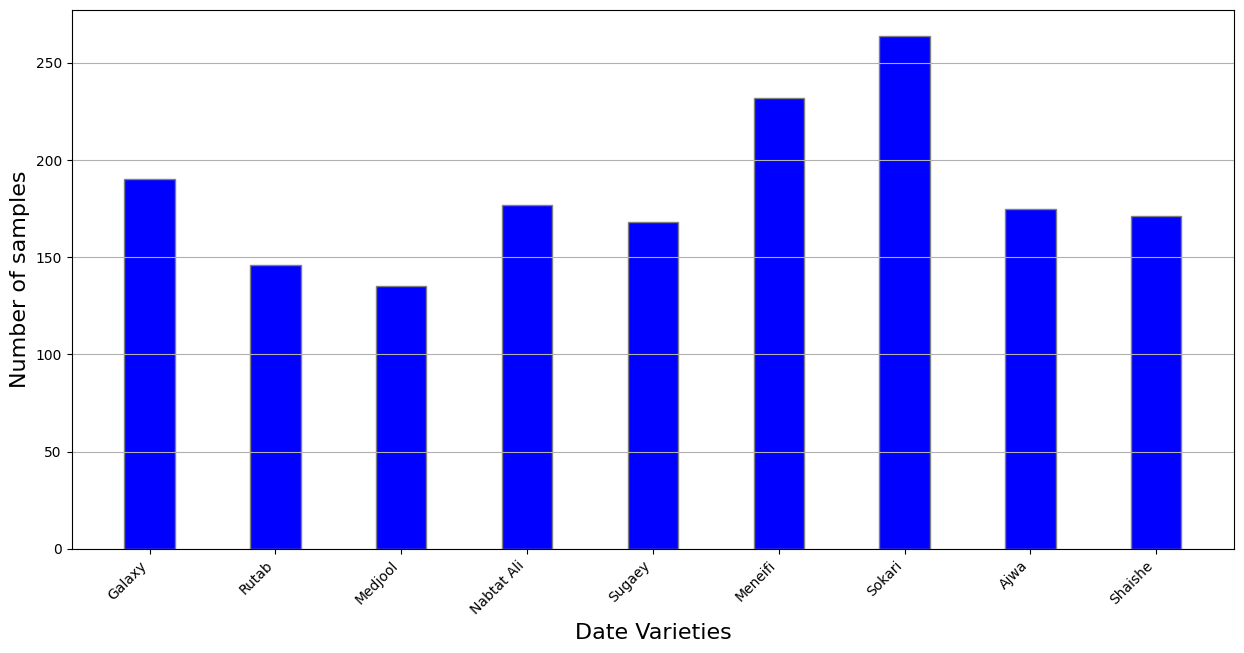

In [ ]:
import matplotlib.pyplot as plt

# Get the data from the DataFrame
data = df_data_distribution['Number of Files'].tolist()
labels = df_data_distribution.index.tolist()

# Create the curve barplot
plt.figure(figsize=(15, 7))
plt.bar(labels, data, color='blue', edgecolor='grey', width=0.4)

# Add title and labels
plt.xlabel('Date Varieties', fontsize=16)
plt.ylabel('Number of samples', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show only y-grid
plt.grid(axis='y')

# Show the plot
plt.show()


!unzip '/content/date-fruit-datasets.zip' -d '/content/dataset'

In [ ]:
pip install vit_keras


In [ ]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images(folder_path, img_size):
    X = []
    y = []
    label_map = {}  # To store the mapping of class labels to integers
    label_counter = 0

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            label_map[label] = label_counter
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Read original image using OpenCV
                original_img = cv2.imread(file_path)
                # Plot original image
                plt.figure()
                plt.subplot(1, 2, 1)
                plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
                plt.title('Original Image')

                # Read and preprocess image
                img = cv2.resize(original_img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img / 255.0  # Normalize pixel values
                # Plot preprocessed image
                plt.subplot(1, 2, 2)
                plt.imshow(img)
                plt.title('Preprocessed Image')
                plt.show()

                # Append preprocessed image and label
                X.append(img)
                y.append(label_counter)
            label_counter += 1

    return np.array(X), np.array(y), label_map

# Example usage
folder_path = "/content/date_dataset"
img_size = (224, 224)
X, y, label_map = load_images(folder_path, img_size)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from keras.applications import DenseNet121, EfficientNetB0, MobileNetV2, ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

# Define the path to the folder containing images
folder_path = "/content/date_dataset"

# Define the image size
img_size = (224, 224)

# Function to load and process images
def load_images(folder_path, img_size):
    X = []
    y = []
    label_map = {}  # To store the mapping of class labels to integers
    label_counter = 0

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            label_map[label] = label_counter
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Read image using OpenCV
                img = cv2.imread(file_path)
                # Resize image
                img = cv2.resize(img, img_size)
                # Convert image to RGB (OpenCV reads images in BGR format)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Normalize pixel values to range [0, 1]
                img = img / 255.0
                X.append(img)
                y.append(label_counter)
            label_counter += 1

    return np.array(X), np.array(y), label_map

# Load and process images
X, y, label_map = load_images(folder_path, img_size)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def extract_vit_features(images):
    # Load the Vision Transformer model
    vit_model = vit.vit_b16(
        image_size=224,
        pretrained=True
    )
    #

In [ ]:
import numpy as np
from vit_keras import vit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from keras.applications import DenseNet121
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

# Function to extract features using DenseNet121
def extract_densenet_features(images):
    base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')
    features = base_model.predict(images)
    return features

# Function to extract features using ViT (Vision Transformer)

# Function to combine features
def combine_features(densenet_features, vit_features):
    combined_features = np.concatenate((densenet_features, vit_features), axis=1)
    return combined_features




/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import numpy as np
from vit_keras import vit
from tensorflow.keras.applications import DenseNet121
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

# Assuming X is a 4D array representing images
# Reshape the input data to ensure consistent dimensions
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2], 3))

# Preprocess the data and split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features using DenseNet121 and ViT
densenet_features_train = extract_densenet_features(X_train)
vit_features_train = extract_vit_features(X_train)

# Combine features for the training set
combined_features_train = combine_features(densenet_features_train, vit_features_train)

# Extract features for the test set
densenet_features_test = extract_densenet_features(X_test)
vit_features_test = extract_vit_features(X_test)

# Combine features for the test set
combined_features_test = combine_features(densenet_features_test, vit_features_test)

# Perform classification using XGBoost
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(combined_features_train, y_train)

# Make predictions on the testing set
y_pred = xgboost_classifier.predict(combined_features_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("F1-score:", f1)


In [ ]:
# prompt: elapsed time per image on ms

elapsed_time_per_image_ms = (1.406987 / len(X_test)) * 1000
print("Elapsed time per image:", elapsed_time_per_image_ms, "ms")


Elapsed time per image: 4.23791265060241 ms


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from vit_keras import vit
from tensorflow.keras.applications import DenseNet121

# Define the path to the folder containing images
folder_path = "/content/date_dataset"

# Define the image size
img_size = (224, 224)

# Function to load and process images
def load_images(folder_path, img_size):
    X = []
    y = []
    label_map = {}  # To store the mapping of class labels to integers
    label_counter = 0

    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            label_map[label] = label_counter
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Read image using OpenCV
                img = cv2.imread(file_path)
                # Resize image
                img = cv2.resize(img, img_size)
                # Convert image to RGB (OpenCV reads images in BGR format)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Normalize pixel values to range [0, 1]
                img = img / 255.0
                X.append(img)
                y.append(label_counter)
            label_counter += 1

    return np.array(X), np.array(y), label_map

# Load and process images
X, y, label_map = load_images(folder_path, img_size)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to ensure consistent dimensions
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

# Function to extract features using DenseNet121
def extract_densenet_features(images):
    base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')
    features = base_model.predict(images)
    return features

# Function to extract features using Vision Transformer (ViT)
def extract_vit_features(images):
    # Load the Vision Transformer model
    vit_model = vit.vit_b16(
        image_size=224,
        pretrained=True
    )
    # Extract features
    features = vit_model.predict(images)
    return features

# Extract features using DenseNet121 and ViT
densenet_features_train = extract_densenet_features(X_train)
vit_features_train = extract_vit_features(X_train)

# Combine features for the training set
combined_features_train = np.concatenate((densenet_features_train, vit_features_train), axis=1)

# Extract features for the test set
densenet_features_test = extract_densenet_features(X_test)
vit_features_test = extract_vit_features(X_test)

# Combine features for the test set
combined_features_test = np.concatenate((densenet_features_test, vit_features_test), axis=1)

# Perform classification using XGBoost
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(combined_features_train, y_train)

# Make predictions on the testing set
y_pred = xgboost_classifier.predict(combined_features_test)

# Evaluate the classifier

print("F1-score:", f1)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)


print("XGBoost Classifier Metrics:",accuracy )

XGBoost Classifier Metrics: 0.9548192771084337


In [ ]:
# prompt: cacuate the elapsed tim

import time

start_time = time.time()

y_pred = xgboost_classifier.predict(combined_features_test)

end_time = time.time()

elapsed_time = end_time - start_time

print("Elapsed time:", elapsed_time, "seconds")


Elapsed time: 0.020110607147216797 seconds


In [ ]:
# prompt: elapsed time per image on ms

elapsed_time_per_image_ms = (elapsed_time / len(combined_features_test)) * 1000
print("Elapsed time per image:", elapsed_time_per_image_ms, "ms")

Elapsed time per image: 0.0605741179133036 ms


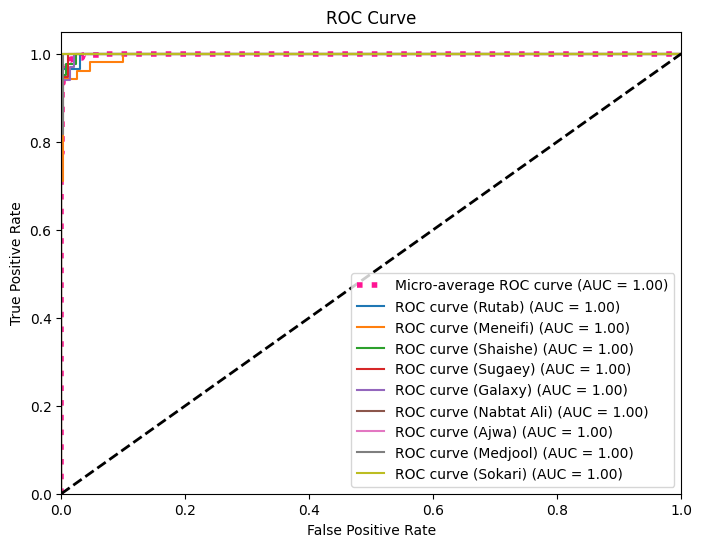

Classification Report:
              precision    recall  f1-score   support

       Rutab       1.00      0.97      0.98        29
     Meneifi       0.96      0.92      0.94        52
     Shaishe       1.00      0.93      0.96        42
      Sugaey       0.93      0.97      0.95        38
      Galaxy       0.91      0.97      0.94        33
  Nabtat Ali       1.00      1.00      1.00        35
        Ajwa       1.00      1.00      1.00        40
     Medjool       0.95      0.95      0.95        22
      Sokari       0.95      1.00      0.98        41

    accuracy                           0.97       332
   macro avg       0.97      0.97      0.97       332
weighted avg       0.97      0.97      0.97       332



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

# Define class labels
class_names = list(label_map.keys())

# Plot ROC curve
y_score = xgboost_classifier.predict_proba(combined_features_test)
n_classes = len(class_names)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})', color='deeppink', linestyle=':', linewidth=4)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve ({class_names[i]}) (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


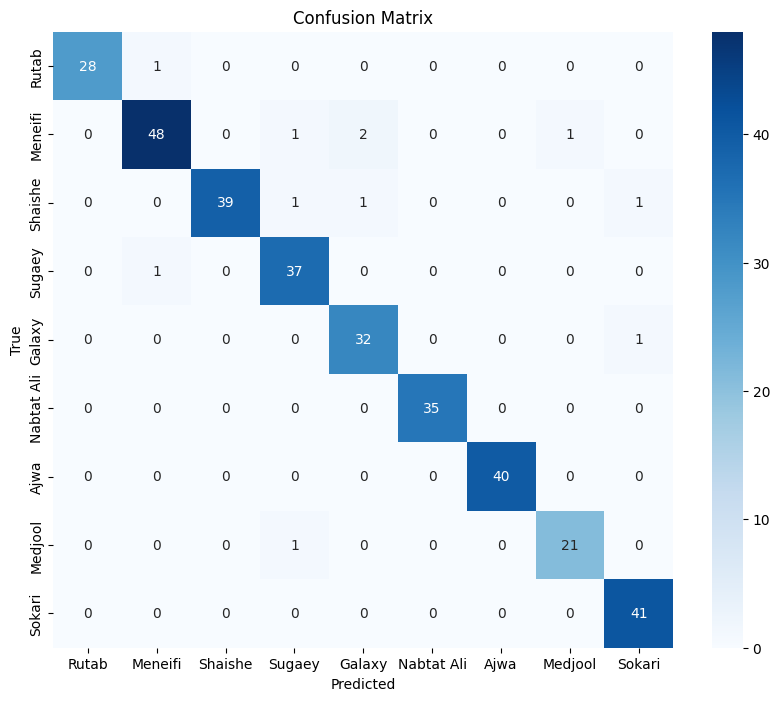

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
# For micro-average
f1_micro = f1_score(y_test, y_pred, average='micro')

# For macro-average
f1_macro = f1_score(y_test, y_pred, average='macro')

# For weighted-average
f1_weighted = f1_score(y_test, y_pred, average='weighted')


print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("F1-score:", f1_weighted, f1_macro, f1_micro )

XGBoost Classifier Metrics:
Accuracy: 0.9668674698795181
F1-score: 0.9668998918364803 0.96746954710491 0.9668674698795181


In [ ]:
# Initialize the OneVsRestClassifier with the xgboost_classifier
clf = OneVsRestClassifier(xgboost_classifier)
# Fit the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = clf.predict_proba(X_test)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8])  # Update classes with your actual class labels

# Define a list to store the ROC AUC scores for each classifier
roc_auc_scores = []
clf = OneVsRestClassifier(xgboost_classifier)
clf.fit(X_train, y_train)

# Predictions on the test set
y_score = clf.predict_proba(X_test)

# Ensure y_test_binarized is reshaped to 2D
y_test_binarized = y_test_binarized.reshape(-1, 9)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
lw = 2
for i in range(9):
    plt.plot(fpr[i], tpr[i], lw=lw, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})', color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{xgboost_classifier.__class__.__name__} - ROC curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
 #Extract features using DenseNet121 and ViT
densenet_features = extract_densenet_features(X_train)
vit_features = extract_vit_features(X_train)

# Combine features
combined_features_train = combine_features(densenet_features, vit_features)

# Extract features for test set
densenet_features_test = extract_densenet_features(X_test)
vit_features_test = extract_vit_features(X_test)
combined_features_test = combine_features(densenet_features_test, vit_features_test)

# Perform classification using XGBoost
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(combined_features_train, y_train)

# Make predictions on the testing set
y_pred = xgboost_classifier.predict(combined_features_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("F1-score:", f1)


In [ ]:
from vit_keras import vit
vit_features = extract_vit_features(X_train)

347502902/347502902 [==============================] - 21s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [ ]:
# Extract features using DenseNet121 and ViT
import tensorflow as tf
from vit_keras import vit
densenet_features = extract_densenet_features(X_train)



In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder



# Initialize and train Random Forest classifier for Bagging
rf_bagging = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bagging.fit(X_train, y_train)

# Make predictions on the testing set for Random Forest
y_pred_rf_bagging = rf_bagging.predict(X_test)

# Calculate metrics for Random Forest
accuracy_rf_bagging = accuracy_score(y_test, y_pred_rf_bagging)
f1_rf_bagging = f1_score(y_test, y_pred_rf_bagging, average='weighted')
uac_rf_bagging = recall_score(y_test, y_pred_rf_bagging, average='macro')

print("Random Forest Classifier Metrics for Bagging:")
print("Accuracy:", accuracy_rf_bagging)
print("F1-score:", f1_rf_bagging)
print("UAC:", uac_rf_bagging)

# Initialize and train AdaBoost classifier for Boosting
adaboost_boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_boosting.fit(X_train, y_train)

# Make predictions on the testing set for AdaBoost
y_pred_adaboost_boosting = adaboost_boosting.predict(X_test)

# Calculate metrics for AdaBoost
accuracy_adaboost_boosting = accuracy_score(y_test, y_pred_adaboost_boosting)
f1_adaboost_boosting = f1_score(y_test, y_pred_adaboost_boosting, average='weighted')
uac_adaboost_boosting = recall_score(y_test, y_pred_adaboost_boosting, average='macro')

print("\nAdaBoost Classifier Metrics for Boosting:")
print("Accuracy:", accuracy_adaboost_boosting)
print("F1-score:", f1_adaboost_boosting)
print("UAC:", uac_adaboost_boosting)

# Initialize and train XGBoost classifier for Boosting
xgboost_boosting = XGBClassifier(n_estimators=100, random_state=42)
xgboost_boosting.fit(X_train, y_train)

# Make predictions on the testing set for XGBoost
y_pred_xgboost_boosting = xgboost_boosting.predict(X_test)

# Calculate metrics for XGBoost
accuracy_xgboost_boosting = accuracy_score(y_test, y_pred_xgboost_boosting)
f1_xgboost_boosting = f1_score(y_test, y_pred_xgboost_boosting, average='weighted')
uac_xgboost_boosting = recall_score(y_test, y_pred_xgboost_boosting, average='macro')

print("\nXGBoost Classifier Metrics for Boosting:")
print("Accuracy:", accuracy_xgboost_boosting)
print("F1-score:", f1_xgboost_boosting)
print("UAC:", uac_xgboost_boosting)


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder


 # Initialize and train XGBoost classifier for Boosting
xgboost_boosting = XGBClassifier(n_estimators=100, random_state=42)
xgboost_boosting.fit(X_train, y_train)

# Make predictions on the testing set for XGBoost
y_pred_xgboost_boosting = xgboost_boosting.predict(X_test)

# Calculate metrics for XGBoost
accuracy_xgboost_boosting = accuracy_score(y_test, y_pred_xgboost_boosting)
f1_xgboost_boosting = f1_score(y_test, y_pred_xgboost_boosting, average='weighted')
uac_xgboost_boosting = recall_score(y_test, y_pred_xgboost_boosting, average='macro')

print("\nXGBoost Classifier Metrics for Boosting:")
print("Accuracy:", accuracy_xgboost_boosting)
print("F1-score:", f1_xgboost_boosting)
print("UAC:", uac_xgboost_boosting)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Flatten the images if needed
X = X.reshape(X.shape[0], -1)

# Encode string labels to integer labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.applications import MobileNet, VGG19, DenseNet169, InceptionV3,ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
import cv2  # OpenCV for image processing
from tensorflow.keras.layers import Activation

# Saudian dataset

## vision test


In [ ]:
pip install vit-keras


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from vit_keras import vit
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for ViT
            img_data = resized_image.astype('float32') / 255.0
            X.append(img_data)
            y.append(class_label)

    return np.array(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/date_dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Load pre-trained ViT model
vit_model = vit.vit_b16(image_size=224, pretrained=True, include_top=False, pretrained_top=False, classes=9)

# Step 4: Extract features using the ViT model
train_features = vit_model.predict(X_train)
test_features = vit_model.predict(X_test)

# Step 5: Define and train a classifier using the extracted features
def build_classifier(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

classifier = build_classifier(train_features.shape[1:], num_classes=9)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(train_features, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the classifier on the test set
accuracy = classifier.evaluate(test_features, y_test)[1]
print(f"Accuracy: {accuracy}")


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from vit_keras import vit
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for ViT
            img_data = resized_image.astype('float32') / 255.0
            X.append(img_data)
            y.append(class_label)

    return np.array(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/date_dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Load pre-trained ViT model
vit_model = vit.vit_b16(image_size=224, pretrained=True, include_top=False, pretrained_top=False, classes=9)

# Step 4: Extract features using the ViT model
train_features = vit_model.predict(X_train)
test_features = vit_model.predict(X_test)

# Step 5: Define and train a classifier using the extracted features
def build_classifier(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)  # Flatten the features
    x = Dense(512, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

classifier = build_classifier(train_features.shape[1:], num_classes=9)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(train_features, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the classifier on the test set
accuracy = classifier.evaluate(test_features, y_test)[1]
print(f"Accuracy: {accuracy}")


11/11 [==============================] - 4s 379ms/step
Epoch 1/10
34/34 [==============================] - 2s 10ms/step - loss: 0.9355 - accuracy: 0.6896 - val_loss: 0.4199 - val_accuracy: 0.8496
Epoch 2/10
34/34 [==============================] - 0s 7ms/step - loss: 0.2468 - accuracy: 0.9226 - val_loss: 0.2510 - val_accuracy: 0.9248
Epoch 3/10
34/34 [==============================] - 0s 7ms/step - loss: 0.1119 - accuracy: 0.9726 - val_loss: 0.2656 - val_accuracy: 0.9060
Epoch 4/10
34/34 [==============================] - 0s 5ms/step - loss: 0.0633 - accuracy: 0.9915 - val_loss: 0.1916 - val_accuracy: 0.9286
Epoch 5/10
34/34 [==============================] - 0s 7ms/step - loss: 0.0484 - accuracy: 0.9915 - val_loss: 0.2161 - val_accuracy: 0.9248
Epoch 6/10
34/34 [==============================] - 0s 6ms/step - loss: 0.0277 - accuracy: 0.9962 - val_loss: 0.1861 - val_accuracy: 0.9323
Epoch 7/10
34/34 [==============================] - 0s 7ms/step - loss: 0.0162 - accuracy: 1.0000 - val_

11/11 [==============================] - 0s 5ms/step
F1-score: 0.923258069473647
UAC: 0.9964489379899825


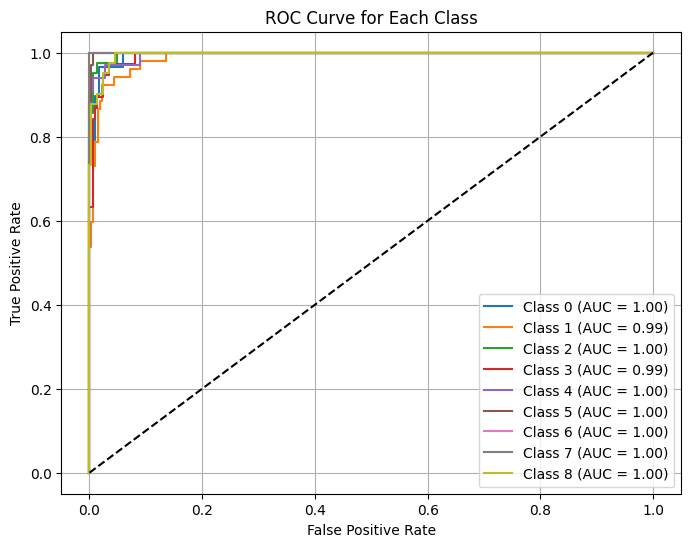

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 7: Evaluate the classifier on the test set
y_pred_prob = classifier.predict(test_features)
y_pred = np.argmax(y_pred_prob, axis=1)

# F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-score: {f1}")

# UAC
auc_scores = []
for class_label in range(num_classes):
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = y_pred_prob[:, class_label]
    auc = roc_auc_score(y_true_class, y_pred_class)
    auc_scores.append(auc)

uac = np.mean(auc_scores)
print(f"UAC: {uac}")

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for class_label in range(num_classes):
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = y_pred_prob[:, class_label]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc_scores[class_label]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Evaluate the model on validation data
val_images, val_labels = val_generator.next()
val_pred_probs = model.predict(val_images)
val_pred_labels = np.argmax(val_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(val_labels, val_pred_labels)

# Calculate F1-score
f1score = f1_score(val_labels, val_pred_labels, average='weighted')

# Calculate UAC (Unweighted Average Recall)
recall = recall_score(val_labels, val_pred_labels, average='macro')

print("Accuracy:", accuracy)
print("F1-score:", f1score)
print("UAC:", recall)


In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import DataLoader

# Define dataset path
dataset_folder = "/content/date_dataset"

# Define transformations
transform = Compose([Resize((224, 224)), ToTensor()])  # Resize images to 224x224 and convert to tensor

# Load dataset
dataset = ImageFolder(dataset_folder, transform=transform)

# Define DataLoader
batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tqdm import tqdm
from transformers import ViTForImageClassification

class VisionTransformer(nn.Module):
    def __init__(self, num_classes):
        super(VisionTransformer, self).__init__()
        # Load pre-trained ViT model
        self.vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k')
        self.num_classes = num_classes
        self.fc = nn.Linear(self.vit_model.config.hidden_size, num_classes)  # Adjusted linear layer

    def forward(self, x):
        x = self.vit_model(x)['logits']
        x = self.fc(x)
        return x


# Define transformations
transform = Compose([Resize((224, 224)), ToTensor()])  # Resize images to 224x224 and convert to tensor

# Load dataset
train_dataset = ImageFolder(root='/content/date_dataset', transform=transform)
test_dataset = ImageFolder(root='/content/date_dataset', transform=transform)  # You can use the same main folder for test data

# Define DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define Vision Transformer model
num_classes = 9  # Define the number of classes in your dataset
model = VisionTransformer(num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluate the model
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    auc = roc_auc_score(true_labels, predictions)  # Assuming binary classification

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}, AUC: {auc:.4f}')

# Print results
print("Results for Vision Transformer Classifier:")
print(f"Accuracy: {accuracy}, F1-score: {f1}, AUC: {auc}")


In [ ]:
pip install transformers


In [ ]:

# Define machine learning models
ml_models = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each machine learning algorithm individually
ml_results = {}
for name, model in ml_models.items():
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test.reshape(X_test.shape[0], -1)), multi_class='ovr')
    ml_results[name] = {'Accuracy': acc, 'F1-score': f1, 'AUC': auc}

# Sort machine learning results by accuracy and select the best model
best_ml_model = max(ml_results, key=lambda x: ml_results[x]['Accuracy'])
best_ml_features = ml_models[best_ml_model].predict_proba(X_train.reshape(X_train.shape[0], -1))
# Print results
print("Results for Machine Learning Algorithms:")
for name, result in ml_results.items():
    print(f"{name}: {result}")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Machine Learning Algorithms:
SVM: {'Accuracy': 0.8162650602409639, 'F1-score': 0.8132044971872745, 'AUC': 0.9868000140726054}
KNN: {'Accuracy': 0.6746987951807228, 'F1-score': 0.6624904871083375, 'AUC': 0.9109324037751523}
Logistic Regression: {'Accuracy': 0.8403614457831325, 'F1-score': 0.8402393168139155, 'AUC': 0.9834539977954844}
Decision Tree: {'Accuracy': 0.6114457831325302, 'F1-score': 0.6097329844378189, 'AUC': 0.7734653617445537}


In [ ]:
# Define pretrained CNN models
cnn_models = {
    'DenseNet121': DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3)),
    'EfficientNetB0': EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3)),
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3)),

}


94765736/94765736 [==============================] - 4s 0us/step


In [ ]:

# Extract features using each deep learning model individually
cnn_results = {}
for name, model in cnn_models.items():
    X_train_cnn = model.predict(X_train)
    X_test_cnn = model.predict(X_test)
    X_train_cnn_features = GlobalAveragePooling2D()(X_train_cnn)
    X_test_cnn_features = GlobalAveragePooling2D()(X_test_cnn)
    cnn_results[name] = (X_train_cnn_features, X_test_cnn_features)

# Sort deep learning results by accuracy and select the best model
best_cnn_model = max(cnn_results, key=lambda x: accuracy_score(y_test, np.argmax(cnn_results[x][1], axis=1)))
best_cnn_features = cnn_results[best_cnn_model][0]

# Combine features from the best machine learning and deep learning models
X_train_combined = np.hstack((best_ml_features, best_cnn_features))
X_test_combined = np.hstack((ml_models[best_ml_model].predict_proba(X_test.reshape(X_test.shape[0], -1)), cnn_results[best_cnn_model][1]))

# Train and evaluate ensemble classifiers using the combined features
ensemble_results = {}
ensemble_models = {
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in ensemble_models.items():
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test_combined), multi_class='ovr')
    ensemble_results[name] = {'Accuracy': acc, 'F1-score': f1, 'AUC': auc}


print("\nResults for Deep Learning Models:")
for name, result in cnn_results.items():
    print(f"{name}: {accuracy_score(y_test, np.argmax(result[1], axis=1))}")

print("\nBest Machine Learning Model:", best_ml_model)
print("Best Deep Learning Model:", best_cnn_model)

print("\nResults for Ensemble Classifiers:")
for name, result in ensemble_results.items():
    print(f"{name}: {result}")


In [ ]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    all_data, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

# Flatten the image data for non-neural network models
x_train_flatten = train_data.reshape((train_data.shape[0], -1))
x_test_flatten = test_data.reshape((test_data.shape[0], -1))

# Use a pre-trained Vision Transformer for feature extraction
vit_feature_extractor = ViTFeatureExtractor(model_name="google/vit-base-patch16-224")

# Convert the list of images to numpy arrays
x_train_np = np.array(train_data)
x_test_np = np.array(test_data)

# Extract features using ViTFeatureExtractor
x_train_features = vit_feature_extractor(images=x_train_np, return_tensors="np", padding=True, truncation=True)
x_test_features = vit_feature_extractor(images=x_test_np, return_tensors="np", padding=True, truncation=True)

# Define the list of models
models = [
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train_flatten, train_labels)

    # Test the model
    y_pred = model.predict(x_test_flatten)

    # Display results
    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(test_labels, y_pred))
    print("\nClassification Report:")
    print(classification_report(test_labels, y_pred))
    print("--------------------------------------------------------")

In [ ]:
import os
import cv2
import numpy as np
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input, Dense
#from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNet, EfficientNetB0
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm

# Function to load dataset from folder
def load_dataset_from_folder(folder_path, image_size=(224, 224)):
    images = []
    labels = []

    # Get the list of subfolders (each representing a class)
    classes = sorted(os.listdir(folder_path))

    for class_label, class_name in enumerate(classes):
        class_folder = os.path.join(folder_path, class_name)
        # Skip if it's not a directory
        if not os.path.isdir(class_folder):
            continue
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            # Read and resize the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            # Append the image and its label to the lists
            images.append(image)
            labels.append(class_label)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load and preprocess data
dataset_folder = "/content/date_dataset"
all_data, all_labels = load_dataset_from_folder(dataset_folder)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Flatten the image data for non-neural network models
x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))

# Define machine learning models
machine_learning_models = [
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# Train and evaluate machine learning models individually
ml_results = {}
for model in machine_learning_models:
    model.fit(x_train_flatten, y_train)
    y_pred = model.predict(x_test_flatten)
    ml_results[model.__class__.__name__] = classification_report(y_test, y_pred)

# Define deep learning models
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = CustomDataset(x_train, y_train, transform=image_transform)
test_dataset = CustomDataset(x_test, y_test, transform=image_transform)

# Train and evaluate deep learning models individually
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)

        train_loss = train_loss / len(train_loader.dataset)
        print(f"Training Loss: {train_loss:.4f}")

        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        test_loss = test_loss / len(test_loader.dataset)
        test_accuracy = correct / total
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Model 1: Define and train a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(16 * 112 * 112, 64)
        self.fc2 = nn.Linear(64, 10)  # Assuming 10 classes

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = x.view(-1, 16 * 112 * 112)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

cnn_model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

train_model(cnn_model, train_loader, test_loader, criterion, optimizer)

# Model 2: Define and train a Vision Transformer (ViT)
vit_feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

class VisionTransformer(nn.Module):
    def __init__(self, vit_model):
        super(VisionTransformer, self).__init__()
        self.vit_model = vit_model

    def forward(self, x):
        outputs = self.vit_model(x)
        return outputs.logits

# Convert dataset to PyTorch tensors
x_train_tensor = torch.tensor(x_train.transpose(0, 3, 1, 2)).float()
x_test_tensor = torch.tensor(x_test.transpose(0, 3, 1, 2)).float()

train_loader_vit = DataLoader(x_train_tensor, batch_size=64, shuffle=True)
test_loader_vit = DataLoader(x_test_tensor, batch_size=64, shuffle=False)

vit_model = VisionTransformer(vit_model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit_model.parameters(), lr=0.001)

train_model(vit_model, train_loader_vit, test_loader_vit, criterion, optimizer)

# Define ensemble methods
ensemble_methods = [
    StackingClassifier(estimators=[
        ('svm', SVC()),
        ('densenet', DenseNet121()),
        ('dt', DecisionTreeClassifier()),
        ('nb', GaussianNB()),
        ('lr', LogisticRegression(max_iter=1000)),
        ('knn', KNeighborsClassifier()),
        ('resnet', ResNet50()),
        ('effnet', EfficientNetB0()),
        ('mobilenet', MobileNet()),
        ('setnet', Senet()),
        ('vit', VisionTransformer(vit_model))
    ]),
    VotingClassifier(estimators=[
        ('svm', SVC()),
        ('densenet', DenseNet121()),
        ('dt', DecisionTreeClassifier()),
        ('nb', GaussianNB()),
        ('lr', LogisticRegression(max_iter=1000)),
        ('knn', KNeighborsClassifier()),
        ('resnet', ResNet50()),
        ('effnet', EfficientNetB0()),
        ('mobilenet', MobileNet()),
        ('setnet', Senet()),
        ('vit', VisionTransformer(vit_model))
    ])
]

# Train and evaluate ensemble methods
ensemble_results = {}
for model in ensemble_methods:
    model.fit(x_train_flatten, y_train)
    y_pred = model.predict(x_test_flatten)
    ensemble_results[model.__class__.__name__] = classification_report(y_test, y_pred)

# Compare performance
print("Machine Learning Models:")
for model, report in ml_results.items():
    print(model)
    print(report)
    print("----------------------")

print("Deep Learning Models:")
print("Simple CNN")
# Print CNN performance
print("ViT")
# Print ViT performance
print("----------------------")

print("Ensemble Methods:")
for model, report in ensemble_results.items():
    print(model)
    print(report)
    print("----------------------")


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from transformers import ViTFeatureExtractor
from PIL import Image

# Specify your dataset directory
dataset_directory = '/content/date_dataset'

# Load and preprocess the data
def load_data(data_dir):
    images = []
    labels = []
    class_folders = sorted(os.listdir(data_dir))
    for label, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_folder)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))  # Adjust the size based on your ViT model requirements
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load all data from the dataset directory
all_data, all_labels = load_data(dataset_directory)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    all_data, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

# Flatten the image data for non-neural network models
x_train_flatten = train_data.reshape((train_data.shape[0], -1))
x_test_flatten = test_data.reshape((test_data.shape[0], -1))

# Use a pre-trained Vision Transformer for feature extraction
vit_feature_extractor = ViTFeatureExtractor(model_name="google/vit-base-patch16-224")
x_train_features = vit_feature_extractor(images=train_data.tolist(), return_tensors="np", padding=True, truncation=True)
x_test_features = vit_feature_extractor(images=test_data.tolist(), return_tensors="np", padding=True, truncation=True)

# Define the list of models
models = [
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train_flatten, train_labels)

    # Test the model
    y_pred = model.predict(x_test_flatten)

    # Display results
    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(test_labels, y_pred))
    print("\nClassification Report:")
    print(classification_report(test_labels, y_pred))
    print("--------------------------------------------------------")


In [ ]:
!pip install transformers


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image

# Assuming train_data and test_data are your image datasets
# Modify the path accordingly based on your dataset structure
train_data_path = 'path/to/train/data'
test_data_path = 'path/to/test/data'

# Load and preprocess the data
def load_data(data_path):
    images = []
    labels = []
    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))  # Adjust the size based on your ViT model requirements
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

train_data, train_labels = load_data(train_data_path)
test_data, test_labels = load_data(test_data_path)

# Flatten the image data for non-neural network models
x_train_flatten = train_data.reshape((train_data.shape[0], -1))
x_test_flatten = test_data.reshape((test_data.shape[0], -1))

# Use a pre-trained Vision Transformer for feature extraction
vit_feature_extractor = ViTFeatureExtractor(model_name="google/vit-base-patch16-224")
x_train_features = vit_feature_extractor(images=train_data.tolist(), return_tensors="np", padding=True, truncation=True)
x_test_features = vit_feature_extractor(images=test_data.tolist(), return_tensors="np", padding=True, truncation=True)

# Define the list of models
models = [
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train_flatten, train_labels)

    # Test the model
    y_pred = model.predict(x_test_flatten)

    # Display results
    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(test_labels, y_pred))
    print("\nClassification Report:")
    print(classification_report(test_labels, y_pred))
    print("--------------------------------------------------------")


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Flatten the image data for non-neural network models
x_train_flatten = train_data.reshape((train_data.shape[0], -1))
x_test_flatten = test_data.reshape((test_data.shape[0], -1))

# Define the list of models
models = [
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train_flatten, train_labels)

    # Test the model
    y_pred = model.predict(x_test_flatten)

    # Display results
    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------")


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Assuming you have loaded and preprocessed the data as (train_data, train_labels), (val_data, val_labels), (test_data, test_labels)

# Make sure labels start from 0 and are consecutive integers
train_labels_numeric = np.argmax(train_labels, axis=1)
test_labels_numeric = np.argmax(test_labels, axis=1)

# Ensure that labels are starting from 0 and are consecutive
unique_train_labels = np.unique(train_labels_numeric)
if np.array_equal(unique_train_labels, np.arange(unique_train_labels[0], unique_train_labels[-1] + 1)):
    # Labels are consecutive, nothing to change
    pass
else:
    # Remap labels to start from 0 and be consecutive
    label_mapping = {label: idx for idx, label in enumerate(unique_train_labels)}
    train_labels_numeric = np.vectorize(label_mapping.get)(train_labels_numeric)
    test_labels_numeric = np.vectorize(label_mapping.get)(test_labels_numeric)

# Flatten the image data for non-neural network models
x_train_flatten = train_data.reshape((train_data.shape[0], -1))
x_test_flatten = test_data.reshape((test_data.shape[0], -1))

# Define the XGBoost model
model = XGBClassifier()

# Specify evaluation set during training
eval_set = [(x_test_flatten, test_labels_numeric)]
model.fit(x_train_flatten, train_labels_numeric, eval_metric="merror", eval_set=eval_set, verbose=True)

# Test the model
y_pred = model.predict(x_test_flatten)

# Display results
print(f"Model: {model.__class__.__name__}")
print("Confusion Matrix:")
print(confusion_matrix(test_labels_numeric, y_pred))
print("\nClassification Report:")
print(classification_report(test_labels_numeric, y_pred))
print("--------------------------------------------------------")

# Plot accuracy per tree
eval_results = model.evals_result()
accuracy_per_tree = eval_results['validation_0']['merror']  # Use 'merror' for classification error

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_per_tree) + 1), accuracy_per_tree, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Trees')
plt.ylabel('Classification Error')
plt.title(f'Classification Error per Tree in {model.__class__.__name__}')
plt.grid(True)
plt.show()


In [ ]:
# Replace NaN and infinity with 0
train_labels_numeric = np.nan_to_num(train_labels_numeric, nan=0.0, posinf=0.0, neginf=0.0)
test_labels_numeric = np.nan_to_num(test_labels_numeric, nan=0.0, posinf=0.0, neginf=0.0)


In [ ]:
# Train the XGBoost model
model.fit(x_train_flatten, train_labels_numeric, eval_metric="merror", eval_set=eval_set, verbose=True)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

def load_and_preprocess_data(data_dir, img_size=(224, 224), test_size=0.2, val_size=0.2, random_state=42):
    # Use ImageDataGenerator for efficient loading and preprocessing
    datagen = ImageDataGenerator(rescale=1./255)

    # Generate data from the directory
    data_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        seed=random_state
    )

    # Get the number of classes
    num_classes = len(data_generator.class_indices)

    # Get data and labels
    X, y = data_generator.next()

    # Split the data into training and test sets
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    except ValueError:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Further split the training set into training and validation sets
    try:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state, stratify=y_train)
    except ValueError:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

# Specify your dataset directory
dataset_directory = '/content/date_dataset'

# Load and preprocess the data
(train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = load_and_preprocess_data(dataset_directory)


Found 1658 images belonging to 9 classes.


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

def load_and_preprocess_data(data_dir, img_size=(224, 224), test_size=0.2, val_size=0.2, random_state=42):
    # Use ImageDataGenerator for efficient loading and preprocessing
    datagen = ImageDataGenerator(rescale=1./255)

    # Generate data from the directory
    data_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        seed=random_state
    )

    # Get the number of classes
    num_classes = len(data_generator.class_indices)

    # Get data and labels
    X, y = data_generator.next()

    # Split the data into training and test sets
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    except ValueError:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Further split the training set into training and validation sets
    try:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state, stratify=y_train)
    except ValueError:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

# Specify your dataset directory
dataset_directory = '/content/date_dataset'

# Load and preprocess the data
(train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = load_and_preprocess_data(dataset_directory)

# Flatten the image data for non-neural network models
x_train_flatten = train_data.reshape((train_data.shape[0], -1))
x_val_flatten = val_data.reshape((val_data.shape[0], -1))
x_test_flatten = test_data.reshape((test_data.shape[0], -1))

# Define the XGBoost model
model = XGBClassifier()

# Train the XGBoost model
model.fit(x_train_flatten, np.argmax(train_labels, axis=1))

# Test the model
y_pred = model.predict(x_test_flatten)

# Display results
print(f"Model: {model.__class__.__name__}")
print("Confusion Matrix:")
print(confusion_matrix(np.argmax(test_labels, axis=1), y_pred))
print("\nClassification Report:")
print(classification_report(np.argmax(test_labels, axis=1), y_pred))
print("--------------------------------------------------------")

# Plot accuracy per tree
eval_results = model.evals_result()
accuracy_per_tree = eval_results['validation_0']['merror']  # Use 'merror' for classification error

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_per_tree) + 1), accuracy_per_tree, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Trees')
plt.ylabel('Classification Error')
plt.title(f'Classification Error per Tree in {model.__class__.__name__}')
plt.grid(True)
plt.show()


In [ ]:
# Assuming you have loaded and preprocessed the data as (train_data, train_labels), (val_data, val_labels), (test_data, test_labels)

# Make sure labels start from 0 and are consecutive integers
train_labels_numeric = np.argmax(train_labels, axis=1)
test_labels_numeric = np.argmax(test_labels, axis=1)

# Ensure that labels are starting from 0 and are consecutive
unique_train_labels = np.unique(train_labels_numeric)
if np.array_equal(unique_train_labels, np.arange(unique_train_labels[0], unique_train_labels[-1] + 1)):
    # Labels are consecutive, nothing to change
    pass
else:
    # Remap labels to start from 0 and be consecutive
    label_mapping = {label: idx for idx, label in enumerate(unique_train_labels)}
    train_labels_numeric = np.vectorize(label_mapping.get)(train_labels_numeric)
    test_labels_numeric = np.vectorize(label_mapping.get)(test_labels_numeric)

# Flatten the image data for non-neural network models
x_train_flatten = train_data.reshape((train_data.shape[0], -1))
x_test_flatten = test_data.reshape((test_data.shape[0], -1))

# Define the XGBoost model
num_classes = len(np.unique(train_labels_numeric))
model = XGBClassifier(num_class=num_classes)

# Train the XGBoost model
model.fit(x_train_flatten, train_labels_numeric)

# Test the model
y_pred = model.predict(x_test_flatten)

# Display results
print(f"Model: {model.__class__.__name__}")
print("Confusion Matrix:")

print("\nClassification Report:")
print(classification_report(test_labels_numeric, y_pred))
print("--------------------------------------------------------")




In [ ]:
# Plot accuracy per tree
eval_results = model.evals_result()
accuracy_per_tree = eval_results['validation_0']['merror']  # Use 'merror' for classification error

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_per_tree) + 1), accuracy_per_tree, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Trees')
plt.ylabel('Classification Error')
plt.title(f'Classification Error per Tree in {model.__class__.__name__}')
plt.grid(True)
plt.show()

In [ ]:
# prompt: use the eval set of in my previous code

eval_results = model.evals_result()
accuracy_per_tree = eval_results['validation_0']['merror']  # Use 'merror' for classification error

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_per_tree) + 1), accuracy_per_tree, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Trees')
plt.ylabel('Classification Error')
plt.title(f'Classification Error per Tree in {model.__class__.__name__}')
plt.grid(True)
plt.show()


In [ ]:
# prompt: use the eval_set in training phase

model.fit(X_train, y_train, eval_set=[(X_val, y_val)], epochs=epochs, verbose=2)


## DenseNet model

In [ ]:
from tensorflow.keras.layers import UpSampling2D, Conv2D, BatchNormalization, Activation, ZeroPadding2D

base_model = tf.keras.applications.DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your classification head on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='elu')(x)
predictions = Dense(9, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('Dense_best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with callbacks
history = model.fit(train_data, train_labels,
                    epochs=50,
                    validation_data=(val_data, val_labels),
                    callbacks=[early_stopping, checkpoint])

51877672/51877672 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  

NameError: name 'train_data' is not defined

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

11/11 - 3s - loss: 0.1336 - accuracy: 0.9699 - 3s/epoch - 301ms/step
Test accuracy: 0.9698795080184937


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_learning_curve(history)

# Generate predictions
y_pred = model.predict(test_data)

# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Display values in each cell
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.show()

plot_confusion_matrix(y_true_classes, y_pred_classes, classes=['Ajwa','Glaxy','Medjool','Meneifi','Nbtat Ali','Rutab','Shaishe','Sokari','Sugaey'])

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Ajwa','Glaxy','Medjool','Meneifi','Nbtat Ali','Rutab','Shaishe','Sokari','Sugaey']))

NameError: name 'history' is not defined

## MobileNet model

In [ ]:
from tensorflow.keras.layers import UpSampling2D, Conv2D, BatchNormalization, Activation, ZeroPadding2D
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your classification head on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='elu')(x)
predictions = Dense(9, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with callbacks
history = model.fit(train_data, train_labels,
                    epochs=50,
                    validation_data=(val_data, val_labels),
                    callbacks=[early_stopping, checkpoint])

NameError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

11/11 - 1s - loss: 0.1263 - accuracy: 0.9608 - 863ms/epoch - 78ms/step
Test accuracy: 0.9608433842658997


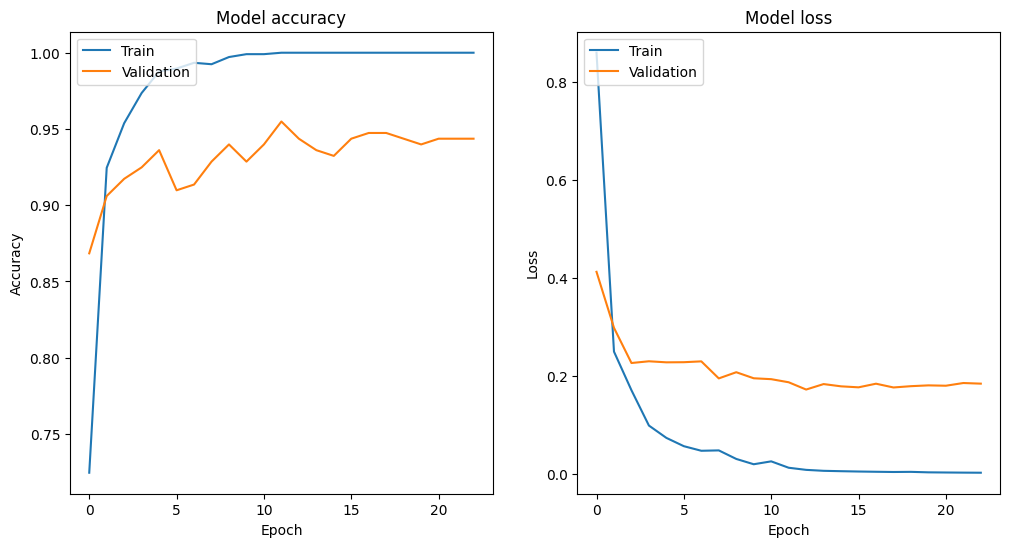

11/11 [==============================] - 2s 53ms/step


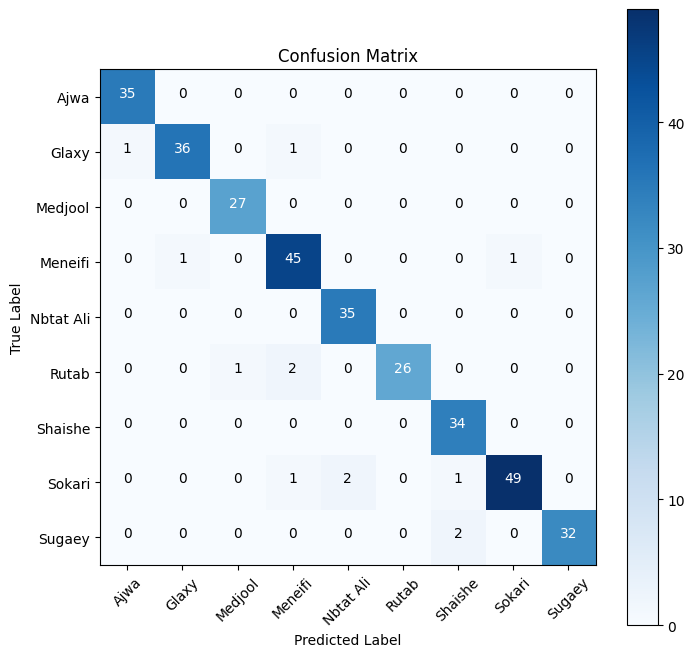

Classification Report:
              precision    recall  f1-score   support

        Ajwa       0.97      1.00      0.99        35
       Glaxy       0.97      0.95      0.96        38
     Medjool       0.96      1.00      0.98        27
     Meneifi       0.92      0.96      0.94        47
   Nbtat Ali       0.95      1.00      0.97        35
       Rutab       1.00      0.90      0.95        29
     Shaishe       0.92      1.00      0.96        34
      Sokari       0.98      0.92      0.95        53
      Sugaey       1.00      0.94      0.97        34

    accuracy                           0.96       332
   macro avg       0.96      0.96      0.96       332
weighted avg       0.96      0.96      0.96       332



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_learning_curve(history)

# Generate predictions
y_pred = model.predict(test_data)

# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Display values in each cell
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.show()

plot_confusion_matrix(y_true_classes, y_pred_classes, classes=['Ajwa','Glaxy','Medjool','Meneifi','Nbtat Ali','Rutab','Shaishe','Sokari','Sugaey'])

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Ajwa','Glaxy','Medjool','Meneifi','Nbtat Ali','Rutab','Shaishe','Sokari','Sugaey']))

## Stacking Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling2D

import matplotlib.pyplot as plt
# Load the saved models
mobilenet_model = load_model('/content/best_model.h5')
densenet_model = load_model('/content/Dense_best_model.h5')

# Freeze the layers of the pretrained models
mobilenet_model.trainable = False
densenet_model.trainable = False

# Define input layer
input_layer = Input(shape=(224, 224, 3), name='input')  # Adjust input shape based on your data

# Get output tensors from the loaded models
mobilenet_output = mobilenet_model(input_layer)
densenet_output = densenet_model(input_layer)

# Concatenate the outputs
concatenated_output = Concatenate()([mobilenet_output, densenet_output])
additional_layer = Dense(256, activation='relu')(concatenated_output)

# Global Average Pooling
pooled_output = GlobalAveragePooling2D()(additional_layer)

# Dense layers
dense_layer = Dense(256, activation='relu')(pooled_output)
output_layer = Dense(9, activation='softmax')(dense_layer)  # Assuming 9 classes, adjust based on your task

# Create the stacking model
stacking_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the stacking model
stacking_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Example usage for training
# Assuming you have train_data and train_labels prepared
# Adjust the code based on your actual data preparation and loading

# Train the stacking model
stacking_model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Save the stacking model
stacking_model.save('stacking_model.h5')

# After training, you can use the stacking model for predictions
# Example:
# stacking_model.predict(test_data)


## Fine grained Method

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt
# Define data transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define the path to your dataset
dataset_path = '/content/dataset'

# Create a dataset
full_dataset = datasets.ImageFolder(dataset_path, transform=transform)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size]
)

# Create DataLoader instances
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Load pre-trained DenseNet model
model = models.densenet121(pretrained=True)

# Modify the last layer for fine-grained classification
num_classes = 9  # Replace with the actual number of date varieties
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

# Move the model to the appropriate device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
train_losses = []
val_losses = []

# Lists to store accuracy metrics
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training accuracy and loss
    train_accuracy = correct_train / total_train
    train_loss = running_loss / len(train_loader)
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()

            _, predicted = val_outputs.max(1)
            total_val += val_labels.size(0)
            correct_val += predicted.eq(val_labels).sum().item()

    # Calculate validation accuracy and loss
    val_accuracy = correct_val / total_val
    val_loss = val_loss / len(val_loader)
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

    # Print and plot learning curve
    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

# Plotting the learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
        test_outputs = model(test_inputs)
        _, predicted = test_outputs.max(1)

        all_labels.extend(test_labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Classification report
class_names = ['Ajwa', 'Glaxy', 'Medjool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Spatial Attention Module
import torch
import torch.nn as nn

class SpatialAttention(nn.Module):
    def __init__(self, channels):
        super(SpatialAttention, self).__init__()
        self.conv1 = nn.Conv2d(channels, 1, kernel_size=1, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Calculate average and max pooling along the channel dimension
        avg_pool = torch.mean(x, dim=1, keepdim=True)
        max_pool, _ = torch.max(x, dim=1, keepdim=True)

        # Concatenate along the channel dimension
        combined = torch.cat([avg_pool, max_pool], dim=1)

        # Apply 1x1 convolution followed by sigmoid
        attention = self.sigmoid(self.conv1(combined))

        # Multiply attention weights with the input tensor
        x = attention * x

        return x

# Example usage
channels = 2  # Number of channels in the input tensor
input_tensor = torch.randn(32, channels, 7, 7)
attention_module = SpatialAttention(channels)
output_tensor = attention_module(input_tensor)


# Modified DenseNet model with Spatial Attention
class CustomDenseNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomDenseNet, self).__init__()
        self.densenet = models.densenet121(pretrained=True)
        # Remove the original classifier layers
        self.densenet.classifier = nn.Identity()

        # Add the Spatial Attention module
        self.attention = SpatialAttention(channels=1024)  # Adjust channels based on the DenseNet architecture

        # Add a custom classifier
        self.classifier = nn.Sequential(
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        # Extract features using DenseNet
        features = self.densenet.features(x)

        # Apply attention mechanism
        attention = self.attention(features)

        # Apply attention weights to the original feature map
        features = features * attention

        # Global average pooling
        features = features.mean([2, 3])

        # Custom classifier
        output = self.classifier(features)

        return output

# Example usage
num_classes = 9
model = CustomDenseNet(num_classes)

# Generate a dummy input tensor with 2 channels
dummy_input = torch.randn(32, 2, 224, 224)

# Forward pass through the model
output = model(dummy_input)


RuntimeError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction, bias=False),
            nn.ReLU(),
            nn.Linear(in_channels // reduction, in_channels, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        avg_pool = self.avg_pool(x).view(x.size(0), -1)
        channel_att = self.fc(avg_pool).view(x.size(0), x.size(1), 1, 1)
        return channel_att

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_pool = torch.mean(x, dim=1, keepdim=True)
        max_pool, _ = torch.max(x, dim=1, keepdim=True)
        combined = torch.cat([avg_pool, max_pool], dim=1)
        spatial_att = self.sigmoid(self.conv(combined))
        return spatial_att

class ResNet50WithAttention(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50WithAttention, self).__init__()
        resnet50 = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(resnet50.children())[:-2])  # Remove last pooling and linear layers
        self.avg_pool = nn.AdaptiveAvgPool2d(1)

        # Channel Attention
        self.channel_attention = ChannelAttention(2048)

        # Spatial Attention
        self.spatial_attention = SpatialAttention()

        # Classifier
        self.fc = nn.Linear(2048, num_classes)

    def forward(self, x):
        features = self.features(x)
        avg_pool = self.avg_pool(features)

        # Channel Attention
        channel_att = self.channel_attention(features)
        features = features * channel_att

        # Spatial Attention
        spatial_att = self.spatial_attention(features)
        features = features * spatial_att

        # Global average pooling
        features = avg_pool.view(avg_pool.size(0), -1)

        # Classifier
        output = self.fc(features)

        return output

# Example usage
num_classes = 10
model = ResNet50WithAttention(num_classes)

# Generate a dummy input tensor
dummy_input = torch.randn(32, 3, 224, 224)

# Forward pass through the model
output = model(dummy_input)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 90.2MB/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets


# Define data transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load your custom dataset using ImageFolder


# Define the model, loss function, and optimizer
num_classes = 9 # Number of classes in your dataset
model = ResNet50WithAttention(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Evaluation loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch [1/10], Loss: 1.9540627002716064


## XGBoost classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from keras.applications import DenseNet121
from keras.applications.densenet import preprocess_input

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path)  # Load image

            # Resize image to the input size expected by DenseNet
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess input for DenseNet
            preprocessed_image = preprocess_input(resized_image)

            # Append preprocessed image to X and labels to y
            X.append(preprocessed_image)
            y.append(class_label)

    return np.array(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/date_dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained DenseNet121 model (excluding the top layer for classification)
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using the pre-trained DenseNet121 model
X_train_features = densenet_model.predict(X_train)
X_test_features = densenet_model.predict(X_test)

# Flatten the features
X_train_flatten = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_flatten = X_test_features.reshape(X_test_features.shape[0], -1)

# Use XGBoost for classification
model = XGBClassifier()
model.fit(X_train_flatten, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_flatten)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


11/11 [==============================] - 4s 355ms/step
Accuracy: 0.9698795180722891


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      1.00      0.98        58
           2       1.00      0.95      0.98        63
           3       1.00      1.00      1.00        30
           4       0.93      1.00      0.96        25
           5       1.00      0.88      0.94        42
           6       0.96      0.96      0.96        28
           7       0.93      1.00      0.96        27
           8       1.00      1.00      1.00        30

    accuracy                           0.97       332
   macro avg       0.97      0.97      0.97       332
weighted avg       0.97      0.97      0.97       332

Confusion Matrix:
[[28  0  0  0  1  0  0  0  0]
 [ 0 58  0  0  0  0  0  0  0]
 [ 2  0 60  0  0  0  1  0  0]
 [ 0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0]
 [ 1  1  0  0  1 37  0  2  0]
 [ 0  1  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0 

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from scipy.optimize import minimize

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path)  # Load image

            # Resize image to the input size expected by VGG16
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess input for VGG16
            preprocessed_image = preprocess_input(resized_image)

            # Append preprocessed image to X and labels to y
            X.append(preprocessed_image)
            y.append(class_label)

    return np.array(X), np.array(y)

# Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model (VGG16 for example)
cnn_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using the pre-trained CNN model
X_train_features = cnn_model.predict(X_train)
X_test_features = cnn_model.predict(X_test)

# Flatten the features
X_train_flatten = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_flatten = X_test_features.reshape(X_test_features.shape[0], -1)

# Define the XGBoost model
xgb_model = XGBClassifier()

# Define the objective function for optimization
def objective(params):
    learning_rate, n_estimators, max_depth, min_child_weight, gamma, subsample, colsample_bytree = params
    xgb_model.set_params(
        learning_rate=learning_rate,
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_child_weight=int(min_child_weight),
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree
    )
    xgb_model.fit(X_train_flatten, y_train)
    y_pred = xgb_model.predict(X_test_flatten)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  # Minimize 1 - accuracy

# Initial parameter values
initial_params = [0.01, 100, 5, 3, 0.1, 0.9, 0.9]

# Bounds for each parameter
bounds = [(0.001, 0.1),  # Learning rate
          (50, 200),      # n_estimators
          (3, 10),        # max_depth
          (1, 5),         # min_child_weight
          (0, 1),         # gamma
          (0.8, 1.0),     # subsample
          (0.8, 1.0)]     # colsample_bytree

# Perform optimization
result = minimize(objective, initial_params, bounds=bounds, method='L-BFGS-B')

# Get the best parameters
best_params = result.x

# Print the best parameters
print("Best XGBoost Parameters:", best_params)

# Update XGBoost model with best hyperparameters
xgb_model.set_params(**{
    'learning_rate': best_params[0],
    'n_estimators': int(best_params[1]),
    'max_depth': int(best_params[2]),
    'min_child_weight': int(best_params[3]),
    'gamma': best_params[4],
    'subsample': best_params[5],
    'colsample_bytree': best_params[6]
})

# Train XGBoost model with the best hyperparameters
xgb_model.fit(X_train_flatten, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_flatten)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {accuracy_xgb}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate and print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.97      1.00      0.99        37
           2       0.97      0.97      0.97        67
           3       0.85      0.96      0.90        47
           4       0.83      0.79      0.81        24
           5       0.97      0.86      0.91        36
           6       0.97      0.94      0.96        35
           7       0.87      0.77      0.82        26
           8       0.94      1.00      0.97        31

    accuracy                           0.92       332
   macro avg       0.92      0.91      0.91       332
weighted avg       0.93      0.92      0.92       332

Confusion Matrix:
[[26  0  0  2  0  0  0  1  0]
 [ 0 37  0  0  0  0  0  0  0]
 [ 1  0 65  1  0  0  0  0  0]
 [ 1  0  0 45  0  1  0  0  0]
 [ 1  0  0  3 19  0  0  0  1]
 [ 0  1  0  1  1 31  1  0  1]
 [ 0  0  0  0  0  0 33  2  0]
 [ 0  0  2  1  3  0  0 20  0]
 [ 0  0  0  0 

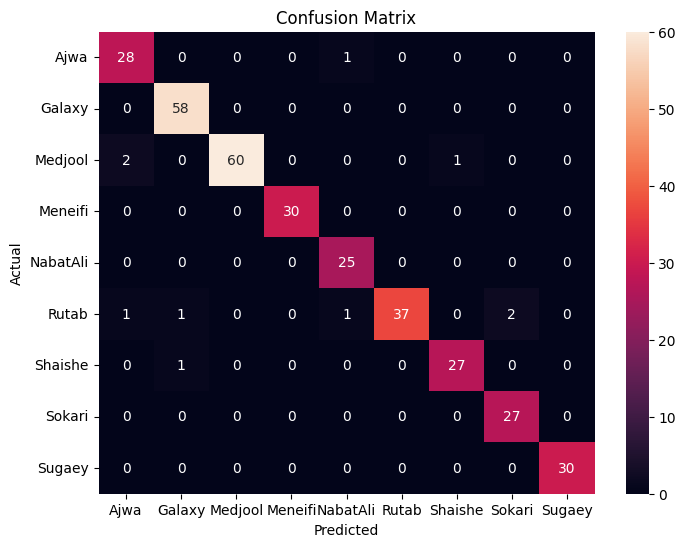

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Ajwa','Galaxy','Medjool','Meneifi','NabatAli','Rutab','Shaishe','Sokari','Sugaey'], yticklabels=['Ajwa','Galaxy','Medjool','Meneifi','NabatAli','Rutab','Shaishe','Sokari','Sugaey'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## MobileNet with XGboost

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path)  # Load image

            # Resize image to the input size expected by DenseNet
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess input for DenseNet
            preprocessed_image = preprocess_input(resized_image)

            # Append preprocessed image to X and labels to y
            X.append(preprocessed_image)
            y.append(class_label)

    return np.array(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained DenseNet121 model (excluding the top layer for classification)
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Reduce the size of your dataset for testing
X_train = X_train[:1000]  # adjust the number of samples as needed
y_train = y_train[:1000]

X_test = X_test[:500]  # adjust the number of samples as needed
y_test = y_test[:500]

# Extract features using the pre-trained DenseNet121 model
X_train_features = mobilenet_model.predict(X_train)
X_test_features = mobilenet_model.predict(X_test)

# Flatten the features
X_train_flatten = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_flatten = X_test_features.reshape(X_test_features.shape[0], -1)

# Use XGBoost for classification
model = XGBClassifier()
model.fit(X_train_flatten, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_flatten)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


## SVM, KNN, Random Forest, XGBoost, Naive Base, Decision Tree

Accuracy (SVM): 0.7078313253012049
Confusion Matrix (SVM):
[[34  0  0  0  0  0  0  1  0]
 [ 0 29  0  1  2  4  1  4  1]
 [ 0  0 25 13  1  0  4  1  0]
 [ 0  0  6 26  0  0  4  2  0]
 [ 0  0  4  0 18  0  2  1  0]
 [ 0  2  0  0  0 44  1  6  0]
 [ 0  0  1  4  0  2 32  3  2]
 [ 0  3  0  1  1  3  4 11  2]
 [ 2  0  1  1  0  0  6  0 16]]


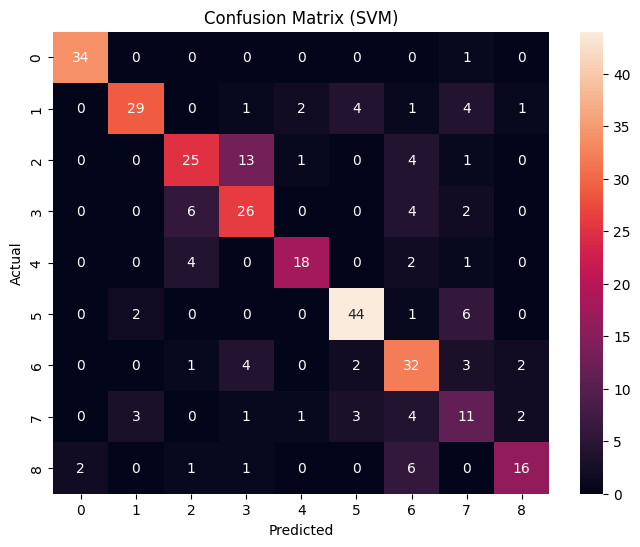

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix


# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(64, 64)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Compute HOG features
            features, _ = hog(resized_image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True)

            # Normalize HOG features
            features = exposure.rescale_intensity(features, in_range=(0, 10))

            # Append features to X and labels to y
            X.append(features)
            y.append(class_label)

    return np.array(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for SVM)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define the SVM model
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm}")

# Generate and print the confusion matrix for SVM
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_mat_svm)

# Plot the confusion matrix for SVM using seaborn with purple color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy (SVM): 0.6144578313253012
Confusion Matrix (knn):
[[33  1  0  0  0  1  0  0  0]
 [ 2 29  0  0  1  6  1  3  0]
 [ 0  0 23 15  1  1  3  1  0]
 [ 0  1 10 20  0  2  4  1  0]
 [ 0  0  4  1 17  0  2  1  0]
 [ 0  6  0  0  0 46  0  1  0]
 [ 0  9  1  2  1  1 25  5  0]
 [ 1  3  0  1  0  7  9  4  0]
 [ 6  1  4  1  1  2  4  0  7]]


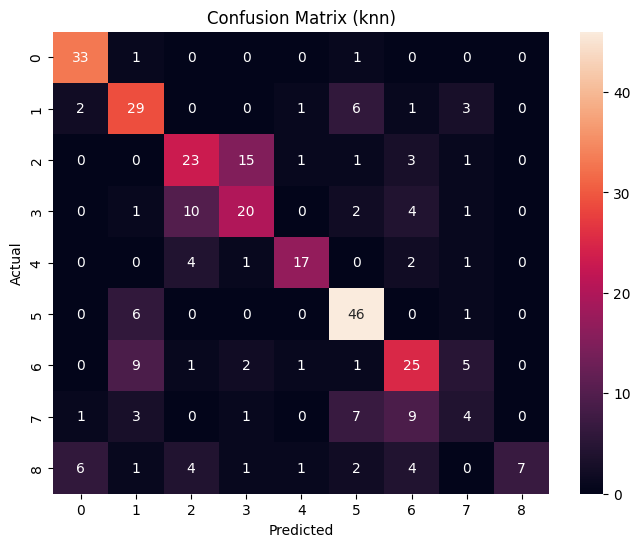

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Define the SVM model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the SVM model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the SVM model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (SVM): {accuracy_knn}")

# Generate and print the confusion matrix for SVM
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (knn):")
print(conf_mat_knn)

# Plot the confusion matrix for SVM using seaborn with purple color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (knn)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy (SVM): 0.6144578313253012
Confusion Matrix (dt):
[[20  3  1  0  0  3  1  4  3]
 [ 2 21  0  3  0  5  2  8  1]
 [ 1  0 24 13  3  1  0  2  0]
 [ 0  0  6 12  1  0  9  4  6]
 [ 0  1  1  1 16  1  2  3  0]
 [ 4  6  2  4  0 24  6  5  2]
 [ 0  0  4  7  2  4 17  5  5]
 [ 0  2  7  1  2  2  6  3  2]
 [ 4  0  2  4  1  4  5  2  4]]


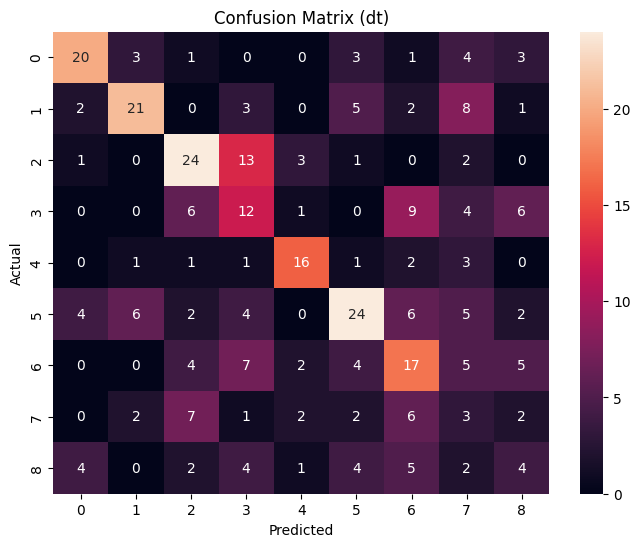

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Define the SVM model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)# Train the SVM model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the SVM model
accuracy_dt = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (SVM): {accuracy_dt}")

# Generate and print the confusion matrix for SVM
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (dt):")
print(conf_mat_dt)

# Plot the confusion matrix for SVM using seaborn with purple color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_dt, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (dt)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy (SVM): 0.6144578313253012
Confusion Matrix (rf):
[[32  1  0  0  0  2  0  0  0]
 [ 0 26  0  0  0 10  3  2  1]
 [ 0  0 28 11  1  0  4  0  0]
 [ 1  0  8 22  1  0  6  0  0]
 [ 0  0  2  0 20  1  2  0  0]
 [ 0  2  0  0  0 45  4  2  0]
 [ 0  1  1  3  1  5 32  1  0]
 [ 0  2  3  1  1  9  5  4  0]
 [ 4  0  2  1  2  1 10  0  6]]


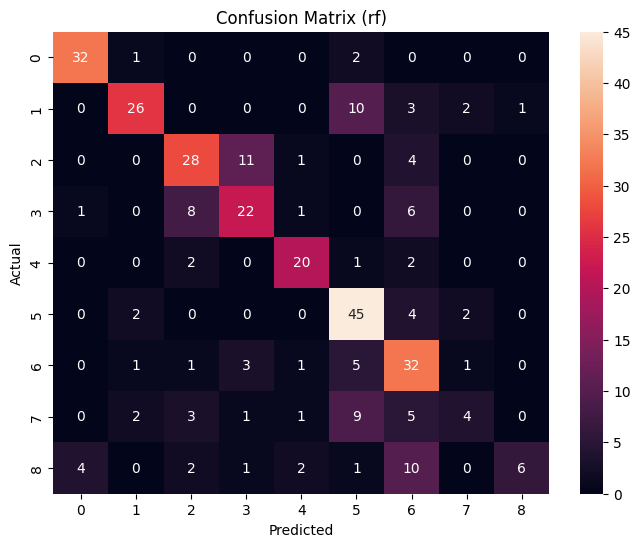

Accuracy (SVM): 0.6144578313253012
Confusion Matrix (rf):
[[32  1  0  0  0  2  0  0  0]
 [ 0 26  0  0  0 10  3  2  1]
 [ 0  0 28 11  1  0  4  0  0]
 [ 1  0  8 22  1  0  6  0  0]
 [ 0  0  2  0 20  1  2  0  0]
 [ 0  2  0  0  0 45  4  2  0]
 [ 0  1  1  3  1  5 32  1  0]
 [ 0  2  3  1  1  9  5  4  0]
 [ 4  0  2  1  2  1 10  0  6]]


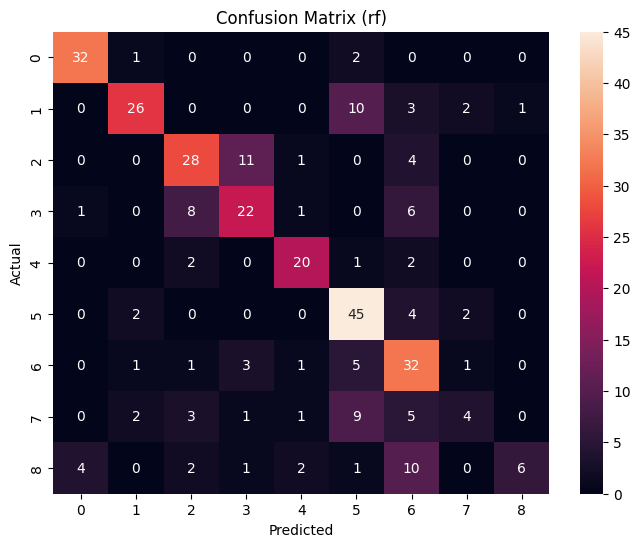

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Define the SVM model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the SVM model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (SVM): {accuracy_dt}")

# Generate and print the confusion matrix for SVM
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (rf):")
print(conf_mat_rf)

# Plot the confusion matrix for SVM using seaborn with purple color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (rf)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Stacking svm, knn, xgbost, dt, rf

Accuracy (Stacking): 0.6987951807228916
Confusion Matrix (Stacking):
[[33  0  0  0  0  0  0  1  1]
 [ 0 31  0  0  0  3  1  4  3]
 [ 0  0 25 13  1  0  3  1  1]
 [ 0  0 10 21  0  0  4  2  1]
 [ 0  0  4  0 19  0  0  1  1]
 [ 0  2  0  0  0 43  1  7  0]
 [ 0  0  2  4  1  2 32  2  1]
 [ 0  3  1  0  0  3  4 12  2]
 [ 2  0  0  1  1  0  6  0 16]]


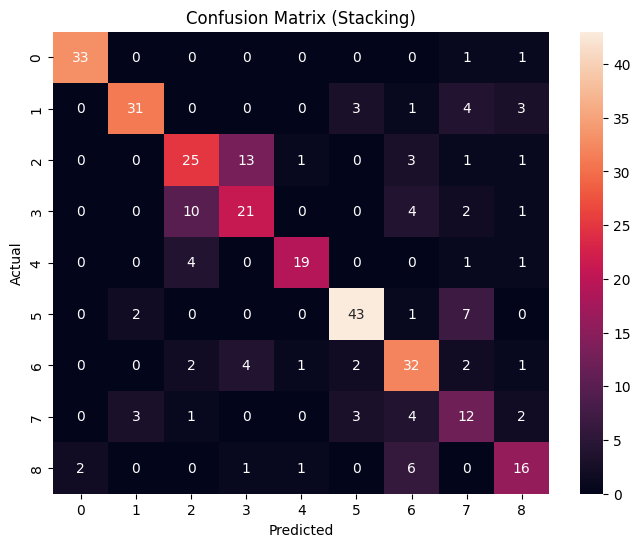

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from skimage import exposure

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(64, 64)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Compute HOG features
            features, _ = hog(resized_image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True)

            # Normalize HOG features
            features = exposure.rescale_intensity(features, in_range=(0, 10))

            # Append features to X and labels to y
            X.append(features)
            y.append(class_label)

    return np.array(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for SVM and KNN)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the base learners
base_learners = [
    ('svm', SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42))
]

# Define the stacking classifier with XGBoost as the meta-learner
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier(), cv=5)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy (Stacking): {accuracy_stacking}")

# Generate and print the confusion matrix for Stacking
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
print("Confusion Matrix (Stacking):")
print(conf_mat_stacking)

# Plot the confusion matrix for Stacking using seaborn with purple color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Stacking)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy (Stacking): 0.6506024096385542
Confusion Matrix (Stacking):
[[31  0  0  0  1  2  0  1  0]
 [ 0 28  0  0  0  5  2  5  2]
 [ 0  0 20 16  3  0  4  0  1]
 [ 0  0  6 23  1  1  5  0  2]
 [ 0  0  4  0 20  0  0  1  0]
 [ 0  3  0  0  0 43  1  6  0]
 [ 1  0  3  3  0  1 26  5  5]
 [ 0  2  2  2  1  2  2 11  3]
 [ 2  0  1  0  1  0  8  0 14]]


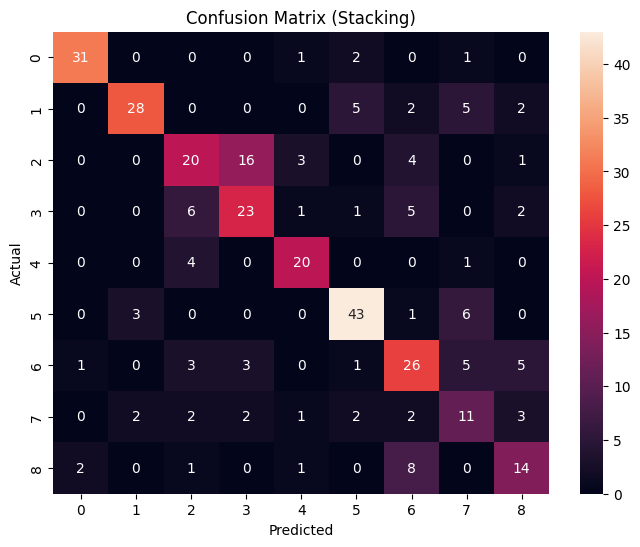

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from skimage import exposure

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(64, 64)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Compute HOG features
            features, _ = hog(resized_image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True)

            # Normalize HOG features
            features = exposure.rescale_intensity(features, in_range=(0, 10))

            # Append features to X and labels to y
            X.append(features)
            y.append(class_label)

    return np.array(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for XGBoost)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the base learner (XGBoost)
base_learner = XGBClassifier()

# Define the stacking classifier with XGBoost as the meta-learner
stacking_model = StackingClassifier(estimators=[('xgboost', base_learner)], final_estimator=XGBClassifier(), cv=5)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy (Stacking): {accuracy_stacking}")

# Generate and print the confusion matrix for Stacking
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
print("Confusion Matrix (Stacking):")
print(conf_mat_stacking)

# Plot the confusion matrix for Stacking using seaborn with purple color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Stacking)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from skimage.feature import hog
from skimage import exposure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(64, 64)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Compute HOG features
            hog_features, _ = hog(resized_image, orientations=8, pixels_per_cell=(16, 16),
                                  cells_per_block=(1, 1), visualize=True)

            # Append features to X and labels to y
            X.append(resized_image)  # Use resized image instead of HOG features for CNN
            y.append(class_label)

    return np.array(X), np.array(y)


# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)  # Add a single-channel dimension
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Normalize pixel values to [0, 1]
X_train_cnn = X_train_cnn / 255.0
X_test_cnn = X_test_cnn / 255.0

# Convert labels to categorical (one-hot encoding)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Define CNN architecture
# Check the number of unique classes in your dataset
num_classes = len(np.unique(y))

# Update the last Dense layer in your model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Update to the correct number of classes

# Compile and train the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=32, validation_split=0.2)


# Extract features using CNN
features_train = model.predict(X_train_cnn)
features_test = model.predict(X_test_cnn)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)

# Train XGBoost on CNN features
xgb_model = XGBClassifier()
xgb_model.fit(features_train_flat, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(features_test_flat)

# Evaluate the XGBoost model on CNN features
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost on CNN features): {accuracy_xgb}")

# Generate and print the confusion matrix for XGBoost on CNN features
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost on CNN features):")
print(conf_mat_xgb)


Epoch 1/100
34/34 [==============================] - 2s 16ms/step - loss: 2.4719 - accuracy: 0.1877 - val_loss: 2.0603 - val_accuracy: 0.2519
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 1.9783 - accuracy: 0.2972 - val_loss: 1.8795 - val_accuracy: 0.3459
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 1.7324 - accuracy: 0.3896 - val_loss: 1.8090 - val_accuracy: 0.2594
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 1.4770 - accuracy: 0.5104 - val_loss: 1.4458 - val_accuracy: 0.5150
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 1.2968 - accuracy: 0.5811 - val_loss: 1.3214 - val_accuracy: 0.5714
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 1.1384 - accuracy: 0.6198 - val_loss: 1.2638 - val_accuracy: 0.5564
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 1.0687 - accuracy: 0.6538 - val_loss: 1.1512 - val_accuracy: 0.5977
Epoch 8/100


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for VGG16
            img_data = image.img_to_array(resized_image)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using VGG16
features_train = base_model.predict(X_train)
features_test = base_model.predict(X_test)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Train XGBoost on VGG16 features
xgb_model = XGBClassifier()
xgb_model.fit(features_train_flat, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(features_train_flat)

# Evaluate the XGBoost model on VGG16 features
accuracy_xgb = accuracy_score(X_train, y_pred_xgb)
print(f"Accuracy (XGBoost on VGG16 features): {accuracy_xgb}")

# Generate and print the confusion matrix for XGBoost on VGG16 features
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost on VGG16 features):")
print(conf_mat_xgb)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for VGG16
            img_data = image.img_to_array(resized_image)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using VGG16
features_train = base_model.predict(X_train)
features_test = base_model.predict(X_test)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Train XGBoost on VGG16 features
xgb_model = XGBClassifier()
xgb_model.fit(features_train_flat, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(features_test_flat)

# Evaluate the XGBoost model on VGG16 features
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost on VGG16 features): {accuracy_xgb}")

# Generate and print the confusion matrix for XGBoost on VGG16 features
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost on VGG16 features):")
print(conf_mat_xgb)


11/11 [==============================] - 1s 120ms/step
Accuracy (XGBoost on VGG16 features): 0.9246987951807228
Confusion Matrix (XGBoost on VGG16 features):
[[35  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  3  2  0  0]
 [ 0  0 37  0  2  0  2  1  2]
 [ 0  0  2 35  0  0  0  0  1]
 [ 0  0  0  0 22  0  2  1  0]
 [ 0  0  0  0  0 52  1  0  0]
 [ 0  0  0  0  0  0 44  0  0]
 [ 0  0  0  0  0  2  0 23  0]
 [ 0  0  0  0  1  0  3  0 22]]


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.applications import MobileNet, DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for VGG16
            img_data = image.img_to_array(resized_image)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/date_dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained VGG16 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Extract features using VGG16
features_train = base_model.predict(X_train)
features_test = base_model.predict(X_test)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Train XGBoost on VGG16 features
xgb_model = XGBClassifier()
xgb_model.fit(features_train_flat, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(features_test_flat)

# Evaluate the XGBoost model on VGG16 features
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost on VGG16 features): {accuracy_xgb}")

# Generate and print the confusion matrix for XGBoost on VGG16 features
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost on VGG16 features):")
print(conf_mat_xgb)


11/11 [==============================] - 4s 367ms/step


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.applications import MobileNet, DenseNet121, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for VGG16
            img_data = image.img_to_array(resized_image)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained VGG16 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Extract features using VGG16
features_train = base_model.predict(X_train)
features_test = base_model.predict(X_test)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Train XGBoost on VGG16 features
xgb_model = XGBClassifier()
xgb_model.fit(features_train_flat, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(features_test_flat)

# Evaluate the XGBoost model on VGG16 features
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost on VGG16 features): {accuracy_xgb}")

# Generate and print the confusion matrix for XGBoost on VGG16 features
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost on VGG16 features):")
print(conf_mat_xgb)


11/11 [==============================] - 3s 243ms/step


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for ResNet50
            img_data = image.img_to_array(resized_image)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Specify the path to your image folder
data_folder = "/content/dataset"

# Load and preprocess the data
X, y = load_and_preprocess_data(data_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using ResNet50
features_train = base_model.predict(X_train)
features_test = base_model.predict(X_test)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Train XGBoost on ResNet50 features
xgb_model = XGBClassifier()
xgb_model.fit(features_train_flat, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(features_test_flat)

# Evaluate the XGBoost model on ResNet50 features
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost on ResNet50 features): {accuracy_xgb}")

# Generate and print the confusion matrix for XGBoost on ResNet50 features
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost on ResNet50 features):")
print(conf_mat_xgb)


11/11 [==============================] - 2s 151ms/step


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images using a generator
def data_generator(folder_path, batch_size=32, image_size=(224, 224)):
    while True:
        X, y = [], []
        for class_label, class_name in enumerate(os.listdir(folder_path)):
            class_path = os.path.join(folder_path, class_name)
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                resized_image = cv2.resize(original_image, image_size)
                img_data = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
                X.append(img_data)
                y.append(class_label)

                if len(X) == batch_size:
                    yield np.array(X), to_categorical(y, num_classes=len(os.listdir(folder_path)))
                    X, y = [], []

# Specify the path to your image folder
data_folder = "/content/dataset"
batch_size = 32
image_size = (224, 224)

# Calculate the number of samples in the training dataset
num_samples = sum(len(os.listdir(os.path.join(data_folder, class_name))) for class_name in os.listdir(data_folder))

# Calculate steps_per_epoch based on the total number of samples and batch size
steps_per_epoch = num_samples // batch_size

# Create data generator
train_generator = data_generator(data_folder, batch_size=batch_size, image_size=image_size)

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a model on top of the pre-trained base model
model = Sequential([
    base_model,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(len(os.listdir(data_folder)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=10)

# Extract features from the pre-trained DenseNet model
features_train = model.predict(train_generator, steps=steps_per_epoch)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train = np.concatenate([to_categorical(y, num_classes=len(os.listdir(data_folder))) for _, y in train_generator], axis=0)

# Train XGBoost on DenseNet features
xgb_model = XGBClassifier()
xgb_model.fit(features_train_flat, np.argmax(y_train, axis=1))


In [ ]:

# If you have a test set, you can similarly extract features and use the XGBoost model for evaluation
test_generator = data_generator(test_folder, batch_size=batch_size, image_size=image_size)
features_test = model.predict(test_generator, steps=len(os.listdir(test_folder)) // batch_size)
features_test_flat = features_test.reshape(features_test.shape[0], -1)
y_test = np.concatenate([to_categorical(y, num_classes=len(os.listdir(test_folder))) for _, y in test_generator], axis=0)
y_pred_xgb = xgb_model.predict(features_test_flat)
accuracy_xgb = accuracy_score(np.argmax(y_test, axis=1), y_pred_xgb)
print(f"Accuracy (XGBoost on DenseNet features): {accuracy_xgb}")


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images using a generator
def data_generator(folder_path, batch_size=32, image_size=(224, 224)):
    while True:
        X, y = [], []
        for class_label, class_name in enumerate(os.listdir(folder_path)):
            class_path = os.path.join(folder_path, class_name)
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                resized_image = cv2.resize(original_image, image_size)
                img_data = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
                X.append(img_data)
                y.append(class_label)

                if len(X) == batch_size:
                    yield np.array(X), to_categorical(y, num_classes=len(os.listdir(folder_path)))
                    X, y = [], []

# Specify the path to your image folder
data_folder = "/content/dataset"
batch_size = 32
image_size = (224, 224)

# Calculate the number of samples in the training dataset
num_samples = sum(len(os.listdir(os.path.join(data_folder, class_name))) for class_name in os.listdir(data_folder))

# Calculate steps_per_epoch based on the total number of samples and batch size
steps_per_epoch = num_samples // batch_size

# Create data generator
train_generator = data_generator(data_folder, batch_size=batch_size, image_size=image_size)

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a model on top of the pre-trained base model
model = Sequential([
    base_model,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(len(os.listdir(data_folder)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=10, verbose=1)

# Extract features from the pre-trained DenseNet model
features_train = model.predict(train_generator, steps=steps_per_epoch)

# Flatten the features
features_train_flat = features_train.reshape(features_train.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train = np.concatenate([to_categorical(y, num_classes=len(os.listdir(data_folder))) for _, y in train_generator], axis=0)

# Train XGBoost on DenseNet features
xgb_model = XGBClassifier()
xgb_model.fit(features_train_flat, np.argmax(y_train, axis=1))

# Now, you can use the xgb_model for predictions


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, Dense, Concatenate
from tensorflow.keras.models import Model
from vit_keras import vit

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(32, 32)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for VGG16
            img_data = VGG16.preprocess_input(resized_image.astype('float32'))

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train CNN (VGG16)
def train_cnn(X):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs=base_model.input, outputs=x)
    cnn_features = cnn_model.predict(X)
    return cnn_features

cnn_features_train = train_cnn(X_train)
cnn_features_test = train_cnn(X_test)

# Step 4: Train ViT
def train_vit(X):
    vit_model = vit.vit_b32(
        image_size=(32, 32),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train)
vit_features_test = train_vit(X_test)

# Combine Features
def combine_features(cnn_features, vit_features):
    combined_features = Concatenate()([cnn_features, vit_features])
    return combined_features

combined_features_train = combine_features(cnn_features_train, vit_features_train)
combined_features_test = combine_features(cnn_features_test, vit_features_test)

# Step 5: Train XGBoost
def train_xgboost(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    return model

xgb_model = train_xgboost(combined_features_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = xgb_model.predict(combined_features_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


ModuleNotFoundError: ignored

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
import vit-keras   # Make sure you have vit-keras installed

# Load and preprocess the data
def load_and_preprocess_data(folder_path, image_size=(32, 32)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for DenseNet121
            img_data = DenseNet121.preprocess_input(resized_image.astype('float32'))

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train CNN (DenseNet121)
def train_cnn(X):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs=base_model.input, outputs=x)
    cnn_features = cnn_model.predict(X)
    return cnn_features

cnn_features_train = train_cnn(X_train)
cnn_features_test = train_cnn(X_test)

# Step 4: Train ViT
def train_vit(X):
    vit_model = vit.vit_b32(
        image_size=(32, 32),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train)
vit_features_test = train_vit(X_test)

# Combine Features
def combine_features(cnn_features, vit_features):
    combined_features = np.concatenate((cnn_features, vit_features), axis=1)
    return combined_features

combined_features_train = combine_features(cnn_features_train, vit_features_train)
combined_features_test = combine_features(cnn_features_test, vit_features_test)

# Step 5: Train XGBoost
def train_xgboost(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    return model

xgb_model = train_xgboost(combined_features_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = xgb_model.predict(combined_features_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


SyntaxError: ignored

In [ ]:
!pip install vit-keras



In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.4 MB/s eta 0:00:00


## DenseNet & EffecienNet without ViT

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for EfficientNet
            img_data = resized_image.astype('float32') / 255.0
            img_data = np.expand_dims(img_data, axis=0)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train EfficientNet
def train_efficientnet(X):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    efficientnet_model = Model(inputs=base_model.input, outputs=x)
    efficientnet_features = efficientnet_model.predict(X)
    return efficientnet_features

efficientnet_features_train = train_efficientnet(X_train)
efficientnet_features_test = train_efficientnet(X_test)

# Step 4: Combine Features
def combine_features(efficientnet_features):
    return efficientnet_features.reshape(efficientnet_features.shape[0], -1)

combined_features_train = combine_features(efficientnet_features_train)
combined_features_test = combine_features(efficientnet_features_test)

# Step 5: Train XGBoost
def train_xgboost(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    return model

xgb_model = train_xgboost(combined_features_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = xgb_model.predict(combined_features_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


11/11 [==============================] - 3s 58ms/step
Accuracy: 0.8373493975903614


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.93      0.85      0.89        65
           2       0.71      0.83      0.76        41
           3       0.79      0.65      0.71        34
           4       0.73      0.76      0.74        21
           5       0.84      0.84      0.84        44
           6       0.77      0.82      0.79        44
           7       1.00      1.00      1.00        23
           8       0.92      0.92      0.92        26

    accuracy                           0.84       332
   macro avg       0.84      0.84      0.84       332
weighted avg       0.84      0.84      0.84       332



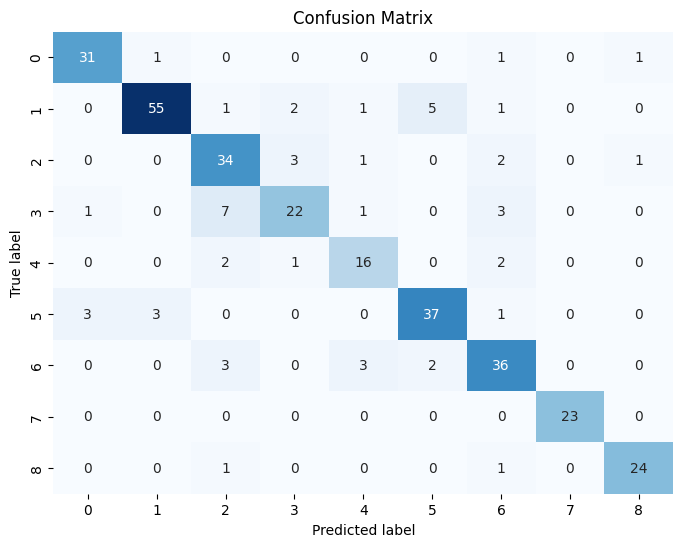

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=range(9), columns=range(9))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
from tensorflow.keras.applications import DenseNet201
def train_DenseNet201(X):
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    DenseNet201_model = Model(inputs=base_model.input, outputs=x)
    DenseNet201_features =DenseNet201_model.predict(X)
    return DenseNet201_features

DenseNet201_features_train = train_DenseNet201(X_train)
DenseNet201_features_test = train_DenseNet201(X_test)

# Step 4: Combine Features
def combine_features(DenseNet201_features):
    return DenseNet201_features.reshape(DenseNet201_features.shape[0], -1)

combined_features_train = combine_features(DenseNet201_features_train)
combined_features_test = combine_features(DenseNet201_features_test)

# Step 5: Train XGBoost
def train_xgboost(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    return model

xgb_model = train_xgboost(combined_features_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = xgb_model.predict(combined_features_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


11/11 [==============================] - 4s 132ms/step
Accuracy: 0.9548192771084337


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=range(num_classes), columns=range(num_classes))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


## DenseNet & EffecienNet with ViT

In [ ]:
from vit_keras import vit
def train_DenseNet201(X):
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    DenseNet201_model = Model(inputs=base_model.input, outputs=x)
    DenseNet201_features = DenseNet201_model.predict(X)
    return DenseNet201_features

DenseNet201_features_train = train_DenseNet201(X_train)
DenseNet201_features_test = train_DenseNet201(X_test)

# Step 5: Train ViT
def train_vit(X):
    vit_model = vit.vit_b32(
        image_size=(224, 224),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train)
vit_features_test = train_vit(X_test)

# Step 6: Combine Features
def combine_features(DenseNet201_features, vit_features):
    combined_features = np.concatenate((DenseNet201_features, vit_features), axis=1)
    return combined_features

combined_features_train = combine_features(DenseNet201_features_train, vit_features_train)
combined_features_test = combine_features(DenseNet201_features_test, vit_features_test)

# Step 7: Train XGBoost
def train_xgboost(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    return model

xgb_model = train_xgboost(combined_features_train, y_train)

# Step 8: Evaluate the model on the test set
y_pred = xgb_model.predict(combined_features_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


353253686/353253686 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


11/11 [==============================] - 4s 117ms/step
Accuracy: 0.9578313253012049


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.96      0.98      0.97        65
           2       0.93      0.98      0.95        41
           3       1.00      1.00      1.00        34
           4       0.95      0.90      0.93        21
           5       0.95      0.93      0.94        44
           6       0.91      0.89      0.90        44
           7       0.96      1.00      0.98        23
           8       1.00      1.00      1.00        26

    accuracy                           0.96       332
   macro avg       0.96      0.96      0.96       332
weighted avg       0.96      0.96      0.96       332



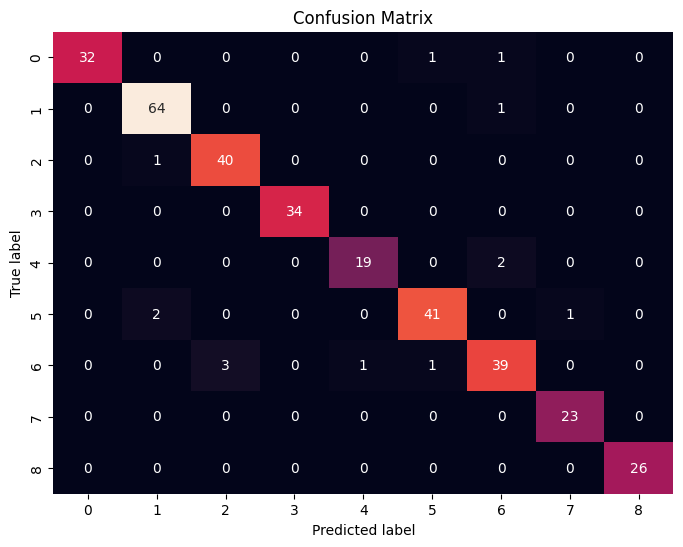

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=range(9), columns=range(9))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from vit_keras import vit
def train_EfficientNetB0(X):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    EfficientNetB0_model = Model(inputs=base_model.input, outputs=x)
    EfficientNetB0_features = EfficientNetB0_model.predict(X)
    return EfficientNetB0_features

EfficientNetB0_features_train = train_EfficientNetB0(X_train)
EfficientNetB0_features_test = train_EfficientNetB0(X_test)

# Step 5: Train ViT
def train_vit(X):
    vit_model = vit.vit_b32(
        image_size=(224, 224),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train)
vit_features_test = train_vit(X_test)

# Step 6: Combine Features
def combine_features(EfficientNetB0_features, vit_features):
    combined_features = np.concatenate((EfficientNetB0_features, vit_features), axis=1)
    return combined_features

combined_features_train = combine_features(EfficientNetB0_features_train, vit_features_train)
combined_features_test = combine_features(EfficientNetB0_features_test, vit_features_test)

# Step 7: Train XGBoost
def train_xgboost(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    return model

xgb_model = train_xgboost(combined_features_train, y_train)

# Step 8: Evaluate the model on the test set
y_pred = xgb_model.predict(combined_features_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

11/11 [==============================] - 2s 58ms/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


11/11 [==============================] - 4s 116ms/step
Accuracy: 0.8885542168674698


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from vit_keras import vit

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for EfficientNet
            img_data = resized_image.astype('float32') / 255.0
            img_data = np.expand_dims(img_data, axis=0)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train EfficientNet
def train_efficientnet(X):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    efficientnet_model = Model(inputs=base_model.input, outputs=x)
    efficientnet_features = efficientnet_model.predict(X)
    return efficientnet_features

efficientnet_features_train = train_efficientnet(X_train)
efficientnet_features_test = train_efficientnet(X_test)

# Step 4: Train ViT
def train_vit(X):
    vit_model = vit.vit_b32(
        image_size=(224, 224),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train)
vit_features_test = train_vit(X_test)

# Step 5: Combine Features
def combine_features(efficientnet_features, vit_features):
    return np.concatenate((efficientnet_features, vit_features), axis=1)

combined_features_train = combine_features(efficientnet_features_train, vit_features_train)
combined_features_test = combine_features(efficientnet_features_test, vit_features_test)

# Step 6: Define and Train a Classifier
num_classes = len(np.unique(y))
inputs = Input(shape=(combined_features_train.shape[1],))
outputs = Dense(num_classes, activation='softmax')(inputs)
classifier_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history = classifier_model.fit(combined_features_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model on the test set
y_pred = np.argmax(classifier_model.predict(combined_features_test), axis=1)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


ModuleNotFoundError: ignored

## Bagging method

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import BaggingClassifier

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for EfficientNet
            img_data = resized_image.astype('float32') / 255.0
            img_data = np.expand_dims(img_data, axis=0)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train EfficientNet
def train_efficientnet(X):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    efficientnet_model = Model(inputs=base_model.input, outputs=x)
    efficientnet_features = efficientnet_model.predict(X)
    return efficientnet_features

efficientnet_features_train = train_efficientnet(X_train)
efficientnet_features_test = train_efficientnet(X_test)

# Step 4: Combine Features
def combine_features(efficientnet_features):
    return efficientnet_features.reshape(efficientnet_features.shape[0], -1)

combined_features_train = combine_features(efficientnet_features_train)
combined_features_test = combine_features(efficientnet_features_test)

# Step 5: Train Bagged XGBoost
def train_bagged_xgboost(X, y, n_estimators=10):
    base_xgb_model = XGBClassifier()
    bagged_xgb_model = BaggingClassifier(base_xgb_model, n_estimators=n_estimators, random_state=42)
    bagged_xgb_model.fit(X, y)
    return bagged_xgb_model

bagged_xgb_model = train_bagged_xgboost(combined_features_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = bagged_xgb_model.predict(combined_features_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


11/11 [==============================] - 3s 58ms/step
Accuracy: 0.8644578313253012


In [ ]:
# prompt:

# Step 8: Save the model
model_path = os.path.join(data_folder, 'bagged_xgboost_model.h5')
bagged_xgb_model.save(model_path)


In [ ]:
# prompt: modify the previous code with densente model
from sklearn.metrics import accuracy_score
import os
import shutil
import random
import numpy as np
from sklearn.ensemble import BaggingClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.applications import MobileNet, VGG19, DenseNet169, InceptionV3,ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
import cv2  # OpenCV for image processing
from tensorflow.keras.layers import Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from vit_keras import vit
from xgboost import XGBClassifier

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for EfficientNet
            img_data = resized_image.astype('float32') / 255.0
            img_data = np.expand_dims(img_data, axis=0)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)



ModuleNotFoundError: ignored

In [ ]:
# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train EfficientNet
def train_efficientnet(X):
    base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    efficientnet_model = Model(inputs=base_model.input, outputs=x)
    efficientnet_features = efficientnet_model.predict(X)
    return efficientnet_features

efficientnet_features_train = train_efficientnet(X_train)
efficientnet_features_test = train_efficientnet(X_test)

# Step 4: Train ViT
def train_vit(X):
    vit_model = vit.vit_b32(
        image_size=(224, 224),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train)
vit_features_test = train_vit(X_test)

# Step 5: Combine Features
def combine_features(efficientnet_features, vit_features):
    return np.concatenate((efficientnet_features, vit_features), axis=1)

combined_features_train = combine_features(efficientnet_features_train, vit_features_train)
combined_features_test = combine_features(efficientnet_features_test, vit_features_test)

# Step 6: Define and Train a Classifier
num_classes = len(np.unique(y))
inputs = Input(shape=(combined_features_train.shape[1],))
outputs = Dense(num_classes, activation='softmax')(inputs)
classifier_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history = classifier_model.fit(combined_features_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model on the test set
y_pred = np.argmax(classifier_model.predict(combined_features_test), axis=1)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

# ## Bagging method


In [ ]:

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for EfficientNet
            img_data = resized_image.astype('float32') / 255.0
            img_data = np.expand_dims(img_data, axis=0)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train EfficientNet
def train_efficientnet(X):
    base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    efficientnet_model = Model(inputs=base_model.input, outputs=x)
    efficientnet_features = efficientnet_model.predict(X)
    return efficientnet_features

efficientnet_features_train = train_efficientnet(X_train)
efficientnet_features_test = train_efficientnet(X_test)

# Step 4: Combine Features
def combine_features(efficientnet_features):
    return efficientnet_features.reshape(efficientnet_features.shape[0], -1)

combined_features_train = combine_features(efficientnet_features_train)
combined_features_test = combine_features(efficientnet_features_test)

# Step 5: Train Bagged XGBoost
def train_bagged_xgboost(X, y, n_estimators=10):
    base_xgb_model = XGBClassifier()
    bagged_xgb_model = BaggingClassifier(base_xgb_model, n_estimators=n_estimators, random_state=42)
    bagged_xgb_model.fit(X, y)
    return bagged_xgb_model

bagged_xgb_model = train_bagged_xgboost(combined_features_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = bagged_xgb_model.predict(combined_features_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




11/11 [==============================] - 4s 116ms/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


11/11 [==============================] - 4s 115ms/step
Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 1.3191 - accuracy: 0.5991 - val_loss: 0.6110 - val_accuracy: 0.8271
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8981 - val_loss: 0.3732 - val_accuracy: 0.8835
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2783 - accuracy: 0.9311 - val_loss: 0.2798 - val_accuracy: 0.9323
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9679 - val_loss: 0.2641 - val_accuracy: 0.9323
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1489 - accuracy: 0.9764 - val_loss: 0.2249 - val_accuracy: 0.9511
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.9840 - val_loss: 0.2036 - val_accuracy: 0.9511
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0971 - accuracy: 0.9887 

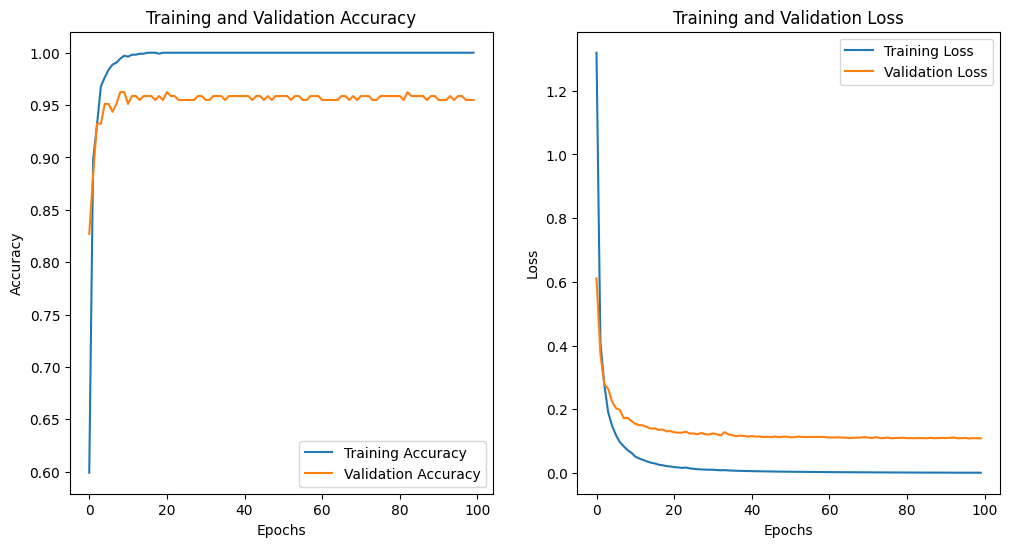

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        46
           3       0.87      0.94      0.91        36
           4       0.92      0.92      0.92        26
           5       1.00      0.95      0.97        20
           6       1.00      0.93      0.96        43
           7       0.98      0.98      0.98        47
           8       0.95      0.95      0.95        38

    accuracy                           0.97       332
   macro avg       0.97      0.96      0.96       332
weighted avg       0.97      0.97      0.97       332



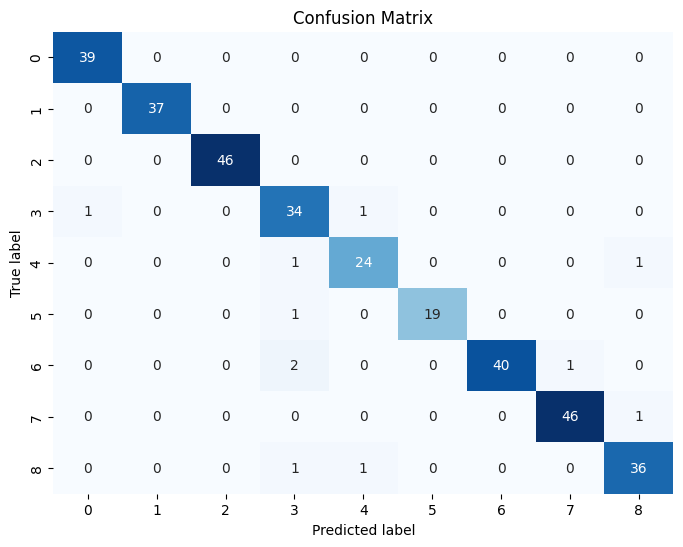

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Learning Curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=range(num_classes), columns=range(num_classes))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
import os
import shutil
import random
import numpy as np
from sklearn.ensemble import BaggingClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, MultiHeadAttention, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.utils import to_categorical
from xgboost import XGBClassifier
from vit_keras import vit
# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for DenseNet
            img_data = resized_image.astype('float32') / 255.0
            img_data = np.expand_dims(img_data, axis=0)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)


In [ ]:
# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)


In [ ]:


# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Combine Features with Attention
def combine_features_with_attention(densenet_features, vit_features):
    num_heads = 2
    key_dim = densenet_features.shape[1] // num_heads

    # Multi-Head Self Attention Layer
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(densenet_features, densenet_features)

    # Concatenate attention output with original features
    combined_features_with_attention = Concatenate(axis=-1)([densenet_features, attention_output])

    return np.concatenate((combined_features_with_attention, vit_features), axis=1)

# Step 3: Train DenseNet
def train_densenet(X):
    base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    densenet_model = Model(inputs=base_model.input, outputs=x)
    densenet_features = densenet_model.predict(X)
    return densenet_features

densenet_features_train = train_densenet(X_train)
densenet_features_test = train_densenet(X_test)

# Step 4: Train ViT
def train_vit(X):
    # Assuming you have the 'vit' module loaded
    vit_model = vit.vit_b32(
        image_size=(224, 224),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train)
vit_features_test = train_vit(X_test)

combined_features_train = combine_features_with_attention(densenet_features_train, vit_features_train)
combined_features_test = combine_features_with_attention(densenet_features_test, vit_features_test)

# Step 6: Define and Train a Classifier with Attention Layer
num_classes = len(np.unique(y_train))
inputs = Input(shape=(combined_features_train.shape[1],))

# Add a Dense layer after attention
dense_output = Dense(256, activation='relu')(inputs)

# Output layer with correct number of units for the number of classes
outputs = Dense(num_classes, activation='softmax')(dense_output)

classifier_model_with_attention = Model(inputs=inputs, outputs=outputs)

# Compile the model
classifier_model_with_attention.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history_with_attention = classifier_model_with_attention.fit(combined_features_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model on the test set
y_pred_with_attention = np.argmax(classifier_model_with_attention.predict(combined_features_test), axis=1)

# Step 8: Evaluate the model
accuracy_with_attention = accuracy_score(y_test, y_pred_with_attention)
print(f"Accuracy with Attention: {accuracy_with_attention}")

# Step 9: Train Bagged XGBoost
def train_bagged_xgboost(X, y, n_estimators=10):
    base_xgb_model = XGBClassifier()
    bagged_xgb_model = BaggingClassifier(base_xgb_model, n_estimators=n_estimators, random_state=42)
    bagged_xgb_model.fit(X, y)
    return bagged_xgb_model

bagged_xgb_model = train_bagged_xgboost(combined_features_train, y_train)

# Step 10: Evaluate the model on the test set
y_pred = bagged_xgb_model.predict(combined_features_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

11/11 [==============================] - 4s 113ms/step


IndexError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
import os
import cv2
import numpy as np
from sklearn.ensemble import BaggingClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, MultiHeadAttention, Concatenate, Reshape
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Function to load and preprocess images from a folder
def load_and_preprocess_data(folder_path, image_size=(224, 224)):
    X, y = [], []

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load image in color

            # Resize image to a fixed size
            resized_image = cv2.resize(original_image, image_size)

            # Preprocess the image for DenseNet
            img_data = resized_image.astype('float32') / 255.0
            img_data = np.expand_dims(img_data, axis=0)

            # Append features to X and labels to y
            X.append(img_data)
            y.append(class_label)

    return np.vstack(X), np.array(y)

# Step 1: Load and preprocess the data
data_folder = "/content/dataset"
X, y = load_and_preprocess_data(data_folder)


In [ ]:
!pip install tensorflow-addons --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
from tensorflow_addons.layers import MultiHeadAttention

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Combine Features with Attention
def combine_features_with_attention(densenet_features, vit_features):
    num_heads = 2
    key_dim = densenet_features.shape[1] // num_heads

    # Multi-Head Self Attention Layer
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)([densenet_features, densenet_features], return_attention_scores=False)

    # Concatenate attention output with original features
    combined_features_with_attention = Concatenate(axis=-1)([densenet_features, attention_output])

    return np.concatenate((combined_features_with_attention, vit_features), axis=1)

# Step 3: Train DenseNet
def train_densenet(X):
    base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    densenet_model = Model(inputs=base_model.input, outputs=x)
    densenet_features = densenet_model.predict(X)
    return densenet_features

densenet_features_train = train_densenet(X_train)
densenet_features_test = train_densenet(X_test)

# Step 4: Train ViT
def train_vit(X):
    # Assuming you have the 'vit' module loaded
    vit_model = vit.vit_b32(
        image_size=(224, 224),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train)
vit_features_test = train_vit(X_test)

combined_features_train = combine_features_with_attention(densenet_features_train, vit_features_train)
combined_features_test = combine_features_with_attention(densenet_features_test, vit_features_test)

# Step 6: Define and Train a Classifier with Attention Layer
num_classes = len(np.unique(y_train))
inputs = Input(shape=(combined_features_train.shape[1],))

# Add a Dense layer after attention
dense_output = Dense(256, activation='relu')(inputs)

# Output layer with correct number of units for the number of classes
outputs = Dense(num_classes, activation='softmax')(dense_output)

classifier_model_with_attention = Model(inputs=inputs, outputs=outputs)

# Compile the model
classifier_model_with_attention.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history_with_attention = classifier_model_with_attention.fit(combined_features_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model on the test set
y_pred_with_attention = np.argmax(classifier_model_with_attention.predict(combined_features_test), axis=1)

# Step 8: Evaluate the model
accuracy_with_attention = accuracy_score(y_test, y_pred_with_attention)
print(f"Accuracy with Attention: {accuracy_with_attention}")

# Step 9: Train Bagged XGBoost
def train_bagged_xgboost(X, y, n_estimators=10):
    base_xgb_model = XGBClassifier()
    bagged_xgb_model = BaggingClassifier(base_xgb_model, n_estimators=n_estimators, random_state=42)
    bagged_xgb_model.fit(X, y)
    return bagged_xgb_model

bagged_xgb_model = train_bagged_xgboost(combined_features_train, y_train)

# Step 10: Evaluate the model on the test set
y_pred = bagged_xgb_model.predict(combined_features_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

11/11 [==============================] - 4s 109ms/step


TypeError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train)
X_test_tf = tf.convert_to_tensor(X_test)

# Step 5: Combine Features with Attention
def combine_features_with_attention(densenet_features, vit_features):
    num_heads = 2
    head_size = densenet_features.shape[1] // num_heads

    # Multi-Head Self Attention Layer
    attention_output = MultiHeadAttention(num_heads=num_heads, head_size=head_size)([densenet_features, densenet_features])

    # Reshape attention output to match the shape of the input features
    attention_output = Reshape((densenet_features.shape[1],))(attention_output)

    # Concatenate attention output with original features
    combined_features_with_attention = Concatenate(axis=-1)([densenet_features, attention_output])

    return np.concatenate((combined_features_with_attention, vit_features), axis=1)

# Step 3: Train DenseNet
def train_densenet(X):
    base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    densenet_model = Model(inputs=base_model.input, outputs=x)
    densenet_features = densenet_model.predict(X)
    return densenet_features

densenet_features_train = train_densenet(X_train_tf)
densenet_features_test = train_densenet(X_test_tf)

# Step 4: Train ViT
def train_vit(X):
    # Assuming you have the 'vit' module loaded
    vit_model = vit.vit_b32(
        image_size=(224, 224),
        activation='sigmoid',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=1,
    )
    vit_features = vit_model.predict(X)
    return vit_features

vit_features_train = train_vit(X_train_tf)
vit_features_test = train_vit(X_test_tf)

combined_features_train = combine_features_with_attention(densenet_features_train, vit_features_train)
combined_features_test = combine_features_with_attention(densenet_features_test, vit_features_test)

# Step 6: Define and Train a Classifier with Attention Layer
num_classes = len(np.unique(y_train))
inputs = Input(shape=(combined_features_train.shape[1],))

# Add a Dense layer after attention
dense_output = Dense(256, activation='relu')(inputs)

# Output layer with correct number of units for the number of classes
outputs = Dense(num_classes, activation='softmax')(dense_output)

classifier_model_with_attention = Model(inputs=inputs, outputs=outputs)

# Compile the model
classifier_model_with_attention.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history_with_attention = classifier_model_with_attention.fit(combined_features_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model on the test set
y_pred_with_attention = np.argmax(classifier_model_with_attention.predict(combined_features_test), axis=1)

# Step 8: Evaluate the model
accuracy_with_attention = accuracy_score(y_test, y_pred_with_attention)
print(f"Accuracy with Attention: {accuracy_with_attention}")

# Step 9: Train Bagged XGBoost
def train_bagged_xgboost(X, y, n_estimators=10):
    base_xgb_model = XGBClassifier()
    bagged_xgb_model = BaggingClassifier(base_xgb_model, n_estimators=n_estimators, random_state=42)
    bagged_xgb_model.fit(X, y)
    return bagged_xgb_model

bagged_xgb_model = train_bagged_xgboost(combined_features_train, y_train)

# Step 10: Evaluate the model on the test set
y_pred = bagged_xgb_model.predict(combined_features_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

11/11 [==============================] - 4s 109ms/step
Epoch 1/100
34/34 [==============================] - 2s 12ms/step - loss: 1.1826 - accuracy: 0.6509 - val_loss: 0.5386 - val_accuracy: 0.8120
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.9198 - val_loss: 0.2401 - val_accuracy: 0.9398
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1465 - accuracy: 0.9642 - val_loss: 0.1663 - val_accuracy: 0.9586
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9689 - val_loss: 0.1847 - val_accuracy: 0.9436
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0662 - accuracy: 0.9868 - val_loss: 0.1671 - val_accuracy: 0.9436
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9925 - val_loss: 0.1666 - val_accuracy: 0.9398
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.9896

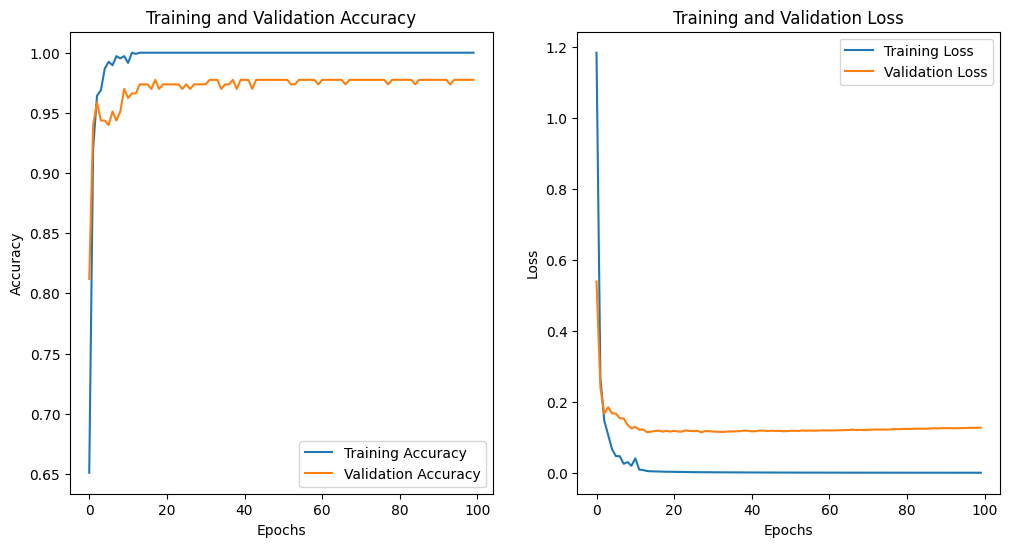

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       1.00      0.73      0.84        37
           2       0.88      0.96      0.92        47
           3       1.00      0.76      0.86        42
           4       0.83      0.93      0.88        27
           5       0.75      1.00      0.85        44
           6       1.00      1.00      1.00        40
           7       1.00      0.91      0.95        22
           8       0.95      0.85      0.90        41

    accuracy                           0.89       332
   macro avg       0.91      0.89      0.90       332
weighted avg       0.91      0.89      0.89       332



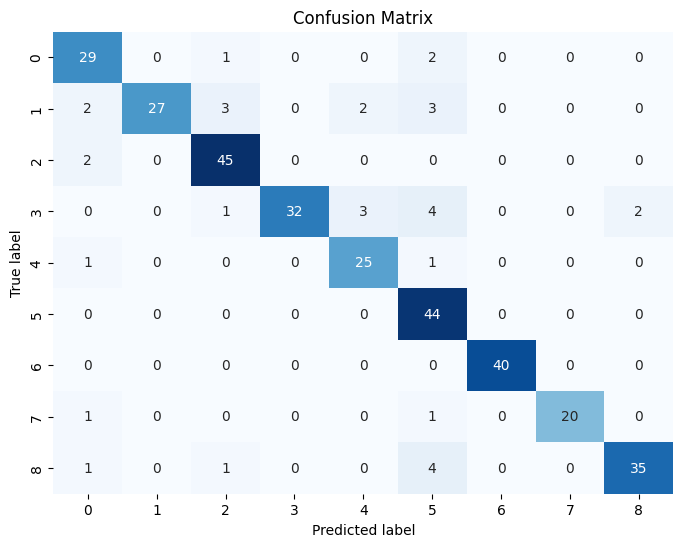

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Learning Curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_with_attention.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_attention.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_with_attention.history['loss'], label='Training Loss')
plt.plot(history_with_attention.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=range(num_classes), columns=range(num_classes))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def train_bagged_ensemble(X, y, n_estimators=10):
    base_xgb_model = XGBClassifier()
    base_dt_model = DecisionTreeClassifier()
    base_lr_model = LogisticRegression()

    # Using a Voting Classifier with different base models
    bagged_ensemble_model = VotingClassifier(estimators=[
        ('xgb', base_xgb_model),
        ('dt', base_dt_model),
        ('lr', base_lr_model)
    ], voting='soft')  # 'soft' for soft voting, which uses predicted probabilities for decision

    bagged_ensemble_model.fit(X, y)
    return bagged_ensemble_model

bagged_ensemble_model = train_bagged_ensemble(combined_features_train, y_train)

# Step 10: Evaluate the model on the test set
y_pred_bagged_ensemble = bagged_ensemble_model.predict(combined_features_test)

# Step 11: Evaluate the model
accuracy_bagged_ensemble = accuracy_score(y_test, y_pred_bagged_ensemble)
print(f"Accuracy with Bagged Ensemble: {accuracy_bagged_ensemble}")

Accuracy with Bagged Ensemble: 0.9126506024096386


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import os
import cv2
import numpy as np

def load_dataset_from_folder(folder_path, image_size=(224, 224)):
    images = []
    labels = []

    # Get the list of subfolders (each representing a class)
    classes = sorted(os.listdir(folder_path))

    for class_label, class_name in enumerate(classes):
        class_folder = os.path.join(folder_path, class_name)
        # Skip if it's not a directory
        if not os.path.isdir(class_folder):
            continue
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            # Read and resize the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            # Append the image and its label to the lists
            images.append(image)
            labels.append(class_label)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Path to the folder containing the dataset
dataset_folder = "/content/date_dataset"

# Load the dataset
images, labels = load_dataset_from_folder(dataset_folder)

print("Dataset loaded successfully.")
print("Number of images:", len(images))
print("Number of labels:", len(labels))
print("Label names:", np.unique(labels))


Dataset loaded successfully.
Number of images: 1658
Number of labels: 1658
Label names: [0 1 2 3 4 5 6 7 8]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0, DenseNet121, MobileNetV2
from tensorflow.keras.optimizers import Adam

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Flatten the image data for non-neural network models
x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))

# Define the list of models
models = [
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

# Train and evaluate each machine learning model individually
for model in models:
    # Train the model
    model.fit(x_train_flatten, y_train)
    # Test the model
    y_pred = model.predict(x_test_flatten)
    # Display results
    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------")

# Preprocess data for pretrained CNN models
x_train_preprocessed = preprocess_input(x_train)
x_test_preprocessed = preprocess_input(x_test)

# Load and compile the EfficientNetB0 model
effnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
effnet_model.trainable = False

# Load and compile the DenseNet121 model
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model.trainable = False

# Load and compile the MobileNetV2 model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_model.trainable = False

# Extract features using pretrained models
x_train_effnet = effnet_model.predict(x_train_preprocessed)
x_test_effnet = effnet_model.predict(x_test_preprocessed)

x_train_densenet = densenet_model.predict(x_train_preprocessed)
x_test_densenet = densenet_model.predict(x_test_preprocessed)

x_train_mobilenet = mobilenet_model.predict(x_train_preprocessed)
x_test_mobilenet = mobilenet_model.predict(x_test_preprocessed)

# Train and evaluate each pretrained CNN model individually
pretrained_models = {
    "EfficientNetB0": (x_train_effnet, x_test_effnet),
    "DenseNet121": (x_train_densenet, x_test_densenet),
    "MobileNetV2": (x_train_mobilenet, x_test_mobilenet)
}

for model_name, (x_train_model, x_test_model) in pretrained_models.items():
    # Train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train_model.reshape((x_train_model.shape[0], -1)), y_train)
    # Test the model
    y_pred = model.predict(x_test_model.reshape((x_test_model.shape[0], -1)))
    # Display results
    print(f"Pretrained Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------")

# Train and evaluate ensemble methods
ensemble_models = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

ensemble_models.extend(pretrained_models.values())

stacking_classifier = StackingClassifier(
    estimators=[(model_name, model) for model_name, (_, _) in pretrained_models.items()] + [("RandomForest", RandomForestClassifier())],
    final_estimator=LogisticRegression(max_iter=1000)
)

for model in ensemble_models + [stacking_classifier]:
    # Train the model
    model.fit(x_train_flatten, y_train)
    # Test the model
    y_pred = model.predict(x_test_flatten)
    # Display results
    print(f"Ensemble Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------")

# Train and evaluate autoencoder-enhanced model
input_img = Input(shape=(224, 224, 3))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(224*224*3, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoder = Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# Train and evaluate autoencoder-enhanced model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_encoded.reshape((x_train_encoded.shape[0], -1)), y_train)
y_pred = model.predict(x_test_encoded.reshape((x_test_encoded.shape[0], -1)))

print("Autoencoder-Enhanced Model")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("--------------------------------------------------------")


Model: GaussianNB
Confusion Matrix:
[[19  1  3  0  0  2  9  1  0]
 [ 2  4  0  7  0  1  3 21  0]
 [ 0  0 18  0  4  1  3  1  0]
 [ 0  0  1 30  1  4  0 11  0]
 [ 0  0  5  4  3  4  5  8  6]
 [ 0  0  0 13  1  9  1  4  1]
 [ 0  0  3  4  0  0  8 19  0]
 [ 0  1  2  5  1  2  5 37  0]
 [ 0  0  4  1  2  1  2  3 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.54      0.68        35
           1       0.67      0.11      0.18        38
           2       0.50      0.67      0.57        27
           3       0.47      0.64      0.54        47
           4       0.25      0.09      0.13        35
           5       0.38      0.31      0.34        29
           6       0.22      0.24      0.23        34
           7       0.35      0.70      0.47        53
           8       0.75      0.62      0.68        34

    accuracy                           0.45       332
   macro avg       0.50      0.43      0.42       332
weighted avg       

In [ ]:
# prompt: import random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rfc.fit(x_train_flatten, y_train)

# Predict the labels for the test data
y_pred = rfc.predict(x_test_flatten)


# Second dataset


In [ ]:
!kaggle datasets download -d muratkokludataset/date-fruit-datasets

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets
License(s): CC0-1.0
  0% 0.00/408k [00:00<?, ?B/s]
100% 408k/408k [00:00<00:00, 101MB/s]


In [ ]:
!unzip '/content/date-fruit-datasets.zip'

Archive:  /content/date-fruit-datasets.zip
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets.arff  
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx  
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt  


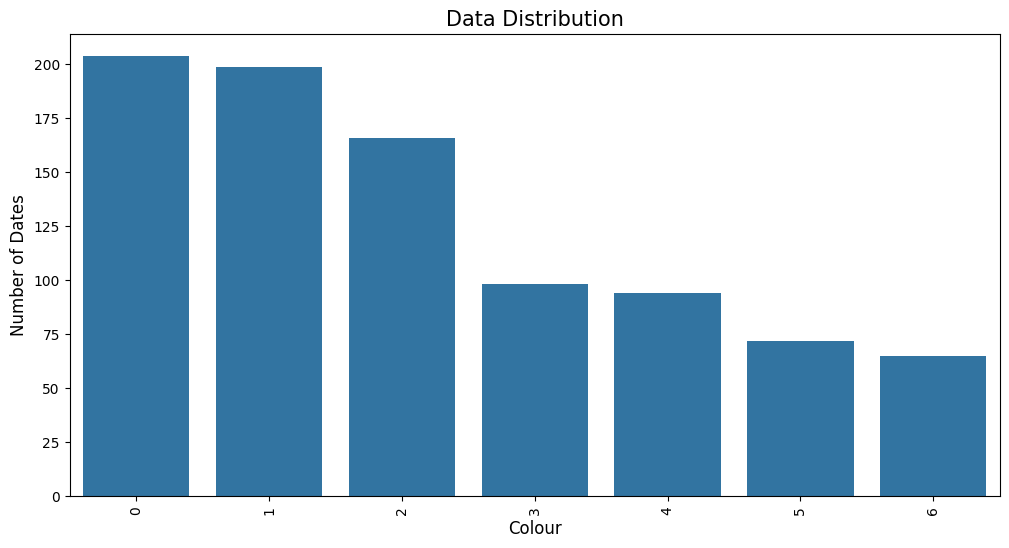

In [ ]:
# prompt: data distribution in barplot from the dataset csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_excel("/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

# Get the data distribution of the 'Colour' column
colour_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(colour_counts.values)
plt.ylabel('Number of Dates', fontsize=12)
plt.xlabel('Colour', fontsize=12)
plt.title('Data Distribution', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
import pandas as pd

# Mount Google Drive (if your file is stored there)

# Specify the path to your Excel file
file_path = '/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'

# Load the dataset into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelEncoder
# Separate features (X) and class labels (y)
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable

# Encode class labels into integer values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Decode the predictions back to original class labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("F1-score:", f1)

XGBoost Classifier Metrics:
Accuracy: 0.9222222222222223
F1-score: 0.9235985642954285


In [ ]:
# prompt: test the memory usage and elapsed time for training and testing of model

import time
import resource

# Start timer
start_time = time.time()

# Train the model
xgb_classifier.fit(X_train, y_train)

# End timer for training
train_time = time.time() - start_time

# Start timer for testing
start_time = time.time()

# Test the model
y_pred = xgb_classifier.predict(X_test)

# End timer for testing
test_time = time.time() - start_time

# Get memory usage
memory_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# Print results
print("Training time:", train_time)
print("Testing time:", test_time)
print("Memory usage:", memory_usage)


Training time: 4.4814794063568115
Testing time: 0.019212007522583008
Memory usage: 704180


In [ ]:
# prompt: elapsed time per image on ms

elapsed_time_per_image_ms = (test_time / len(X_test)) * 1000
print("Elapsed time per image:", elapsed_time_per_image_ms, "ms")


Elapsed time per image: 0.057867492537900626 ms


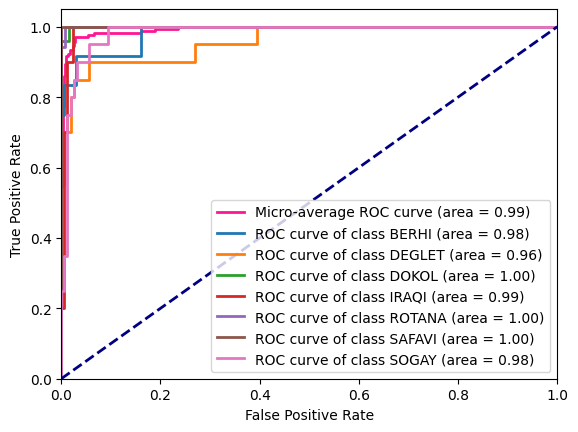

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder, label_binarize
import matplotlib.pyplot as plt
y_score = xgb_classifier.predict_proba(X_test)
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(label_binarize(y_test, classes=range(n_classes)).ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class %s (area = %0.2f)' % (label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()



In [ ]:
# Classification report with class names
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Barhee', 'Deglet Nour', 'Sokari', 'Rotab Mozafati', 'Ruthana', 'Safawi','Sugaey']))


Classification Report:
                precision    recall  f1-score   support

        Barhee       0.90      0.75      0.82        12
   Deglet Nour       0.77      0.85      0.81        20
        Sokari       1.00      0.96      0.98        50
Rotab Mozafati       0.75      0.90      0.82        10
       Ruthana       0.97      0.97      0.97        35
        Safawi       1.00      0.97      0.98        33
        Sugaey       0.81      0.85      0.83        20

      accuracy                           0.92       180
     macro avg       0.89      0.89      0.89       180
  weighted avg       0.93      0.92      0.92       180



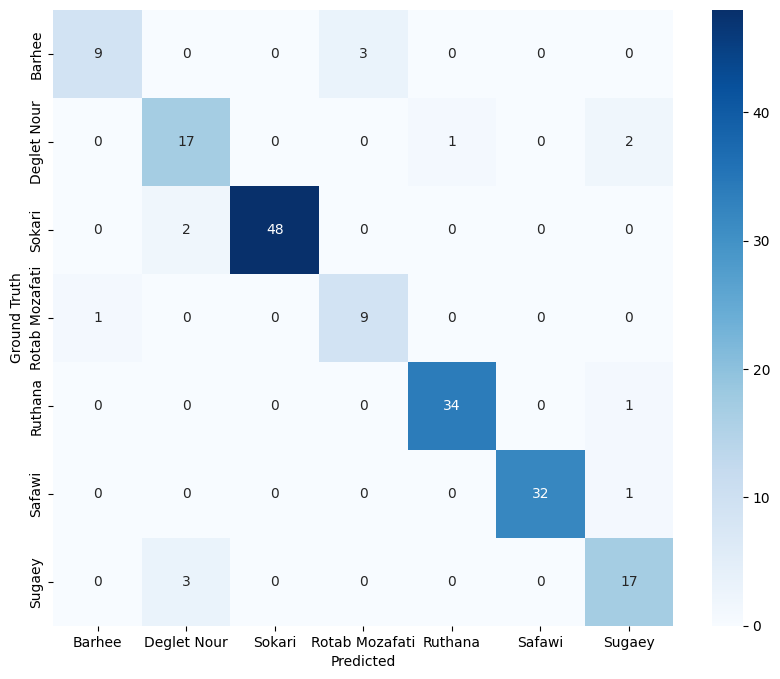

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Barhee', 'Deglet Nour', 'Sokari', 'Rotab Mozafati', 'Ruthana', 'Safawi','Sugaey'], yticklabels=['Barhee', 'Deglet Nour', 'Sokari', 'Rotab Mozafati', 'Ruthana', 'Safawi','Sugaey'])
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

plt.show()


In [ ]:
print(df.columns)

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')


In [ ]:
from matplotlib import pyplot as plt
_df_0['AREA'].plot(kind='hist', bins=20, title='AREA')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_0' is not defined

In [ ]:


x = df.drop(["Class"], axis = 1)
y = df["Class"]



print(y)


0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object


In [ ]:


from sklearn.preprocessing import minmax_scale

x_scaled = minmax_scale(x)
x = pd.DataFrame(x_scaled)

x.sample(5)



,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
219,0.266213,0.281829,0.249868,0.436686,0.692460,0.487632,0.965796,0.264870,0.810119,0.001115,...,0.104940,0.061648,0.043615,0.027921,0.726789,0.671925,0.720709,0.835121,0.808568,0.804193
622,0.583556,0.654353,0.536233,0.656366,0.670482,0.749808,0.937189,0.583914,0.480081,0.001021,...,0.324162,0.010060,0.273985,0.041155,0.880827,0.902915,0.867668,0.257103,0.116154,0.176409
175,0.264801,0.272115,0.205655,0.467953,0.573413,0.486187,0.955846,0.263884,0.810701,0.000705,...,0.256806,0.113825,0.113442,0.058368,0.822355,0.813090,0.824741,0.659414,0.565647,0.582052
602,0.663523,0.750664,0.561707,0.734832,0.598901,0.803465,0.830224,0.675803,0.686828,0.000776,...,0.274615,0.045481,0.036340,0.032606,0.570741,0.541590,0.595377,0.628734,0.527210,0.519704
741,0.544499,0.677954,0.599805,0.578850,0.784646,0.722271,0.867537,0.551104,0.465252,0.001660,...,0.593755,0.230271,0.227589,0.184209,0.885945,0.826412,0.818832,0.241373,0.274001,0.311487


In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
y = lbl.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = "/path/to/your/dataset.csv"
df = pd.read_csv(data_path)

# Split features and labels
X = df.drop(columns=["Class"]).values
y = df["Class"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Custom Vision Transformer for tabular data
def CustomViT(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(num_heads=8, key_dim=32)(x, x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Build and compile the model
model = CustomViT(input_shape=X_train_scaled.shape[1:], num_classes=9)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


IndexError: Exception encountered when calling layer 'softmax' (type Softmax).

tuple index out of range

Call arguments received by layer 'softmax' (type Softmax):
  • inputs=tf.Tensor(shape=(None, 8), dtype=float32)
  • mask=None

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


X_train = X_train.values.reshape(-1, 34, 34, 1)  # Modify the shape according to your data
X_test = X_test.values.reshape(-1, 34, 34, 1)  # Modify the shape according to your data

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(6, 6, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.applications import DenseNet121, EfficientNetB0, MobileNetV2, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd


# Define the classifiers
classifiers = [

    DenseNet121(weights='imagenet', include_top=False),
    EfficientNetB0(weights='imagenet', include_top=False),
    MobileNetV2(weights='imagenet', include_top=False),
    ResNet50(weights='imagenet', include_top=False)
]

# Train and evaluate each classifier
for clf in classifiers:
    if isinstance(clf, (GaussianNB, DecisionTreeClassifier, SVC, LogisticRegression, RandomForestClassifier)):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
    else:
        base_model = clf
        model = Sequential([
            base_model,
            GlobalAveragePooling2D(),
            Dense(7, activation='softmax')
        ])
        model.compile(optimizer=Adam(),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = np.argmax(model.predict(x_test), axis=-1)

    print(f"Model: {clf.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------")


16705208/16705208 [==============================] - 1s 0us/step


94765736/94765736 [==============================] - 3s 0us/step


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'densenet121' (type Functional).
    
    Input 0 of layer "zero_padding2d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 34)
    
    Call arguments received by layer 'densenet121' (type Functional):
      • inputs=tf.Tensor(shape=(None, 34), dtype=float32)
      • training=True
      • mask=None


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load your dataset from Excel file
file_path = '/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Assuming the last column is the target column
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the input data to match image-like format
x_train_img = x_train.values.reshape(-1, 34, 34, 1)  # Assuming 34x34 input size with 1 channel
x_test_img = x_test.values.reshape(-1, 34, 34, 1)

# Normalize the input data
x_train_img = x_train_img.astype('float32') / 255.0
x_test_img = x_test_img.astype('float32') / 255.0

# Load DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape= x_train_img.shape[1:])

# Add custom output layers to the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')  # Assuming 7 classes for classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test_img, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


ValueError: cannot reshape array of size 21352 into shape (34,34,1)

In [ ]:
print("x_train size:", x_train.size)


x_train size: 21352


In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# Assuming you have x_train, y_train, x_test, y_test defined

models = [
     SVC(probability=True),
     KNeighborsClassifier(),
     LogisticRegression(),
    DecisionTreeClassifier()

]

pr_scores = []

for model in models:
    # Each model for training
    model.fit(x_train_imputed, y_train)

    # Predictions on the test set
    y_pred = model.predict(x_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(x_test), average='macro', multi_class='ovr')

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # Calculate average precision score
    average_precision = average_precision_score(y_test, y_pred)

    # Plot the Precision-Recall curve
    plt.step(recall, precision, where='post', label=f'{model.__class__.__name__} (AP = {average_precision:.2f})')

    # Store the precision-recall scores
    pr_scores.append(average_precision)

    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------------------")
     # Calculate metrics

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("--------------------------------------------------------")


# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc='lower left')
plt.show()

ValueError: multiclass format is not supported

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Update classes with your actual class labels

# Define a list to store the ROC AUC scores for each classifier
roc_auc_scores = []

for model in models:
    # Each model for training
    clf = OneVsRestClassifier(model)
    clf.fit(x_train, y_train)

    # Predictions on the test set
    y_score = clf.predict_proba(x_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(7):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for each class
    plt.figure()
    lw = 2
    for i in range(7):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:0.2f})')

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model.__class__.__name__} - ROC curve')
    plt.legend(loc="lower right")
    plt.show()


NameError: name 'models' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load your dataset from Excel file
file_path = '/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Assuming the last column is the target column
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Flatten the input data
x_train_flat = x_train.values.reshape(-1, 34 , 34)  # Assuming 34x34 input size
x_test_flat = x_test.values.reshape(-1, 34 , 34)

# Normalize the input data
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

# Load DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(34 * 34,))

# Add custom output layers to the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')  # Assuming 7 classes for classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_flat, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred = np.argmax(model.predict(x_test_flat), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict_proba(x_test_flat), average='macro', multi_class='ovr')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


ValueError: cannot reshape array of size 21352 into shape (34,34)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


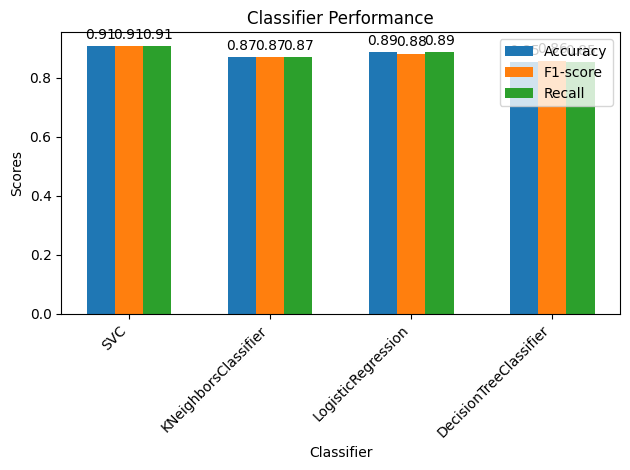

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Define lists to store metrics for each classifier
accuracy_scores = []
f1_scores = []
recall_scores = []
classifier_names = []

for model in models:
    # Each model for training
    model.fit(x_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Store metrics
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    classifier_names.append(model.__class__.__name__)

# Plotting
x = np.arange(len(classifier_names))
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
accuracy_bars = ax.bar(x - width, accuracy_scores, width, label='Accuracy')
f1_bars = ax.bar(x, f1_scores, width, label='F1-score')
recall_bars = ax.bar(x + width, recall_scores, width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifier')
ax.set_ylabel('Scores')
ax.set_title('Classifier Performance')
ax.set_xticks(x)
ax.set_xticklabels(classifier_names, rotation=45, ha='right')
ax.legend()

# Add labels on top of the bars
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(accuracy_bars)
autolabel(f1_bars)
autolabel(recall_bars)

fig.tight_layout()

plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from keras.applications import DenseNet121, EfficientNetB0, MobileNetV2, ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import DenseNet121, EfficientNetB0, MobileNetV2, ResNet50

# Load the dataset
dataset_path = '/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'
df = pd.read_excel(dataset_path)

# Define the image size expected by the pre-trained models
img_size = (224, 224)

# Function to preprocess images
def preprocess_image(image_path, img_size=img_size):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img)
    img_normalized = img_array / 255.0
    return img_normalized

# Preprocess the image data and split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Image_Path'], df['Label'], test_size=0.2, random_state=42)

# Define the list of models
model_names = ['DenseNet121', 'EfficientNetB0', 'MobileNetV2', 'ResNet50']
models = [DenseNet121, EfficientNetB0, MobileNetV2, ResNet50]

# Define lists to store metrics for each model
accuracy_scores = []
f1_scores = []
recall_scores = []

# Loop over each model
for model_name, Model in zip(model_names, models):
    # Load the pre-trained model
    model = Model(weights='imagenet')

    # Preprocess the test data
    x_test_processed = np.array([preprocess_image(img_path) for img_path in X_test])

    # Predictions on the test set
    y_pred = model.predict(x_test_processed)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')

    # Store metrics
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)

    # Print metrics
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}, Recall: {recall:.4f}")

# After classification, you can continue with your data processing steps.
# For example, you can merge the predictions with the original DataFrame:
df_results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred_classes
})

# Display the first few rows of the DataFrame with predictions
print(df_results.head())


KeyError: 'Image_Path'

In [ ]:
# prompt: give the class name of my dataset in list

df['Class'].unique()


array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Assuming you have x_train and y_train defined

# Resize the features to match DenseNet's expected input shape
x_train_resized = tf.image.resize(x_train.values.reshape((-1, 34, 1, 1)), (224, 224))  # Resize to (224, 224)

# Convert grayscale images to RGB by replicating the single channel
x_train_rgb = tf.image.grayscale_to_rgb(x_train_resized)

# Load DenseNet model without top (fully connected layers)
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using DenseNet
x_train_features = densenet_model.predict(x_train_rgb)

# Flatten the features
x_train_features_flat = x_train_features.reshape((x_train_features.shape[0], -1))

# Split the data into training and testing sets
x_train_feats, x_val_feats, y_train_feats, y_val_feats = train_test_split(x_train_features_flat, y_train, test_size=0.2, random_state=42)

# Train XGBoost on the extracted features
xgb_model = XGBClassifier()
xgb_model.fit(x_train_feats, y_train_feats)




20/20 [==============================] - 14s 276ms/step


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from transformers import ViTFeatureExtractor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load and preprocess your dataset
# Assuming you have x_train and y_train defined

# Resize the features to match DenseNet's expected input shape
x_train_resized = tf.image.resize(x_train.values.reshape((-1, 34, 1, 1)), (224, 224))  # Resize to (224, 224)

# Convert grayscale images to RGB by replicating the single channel
x_train_rgb = tf.image.grayscale_to_rgb(x_train_resized)

# Load DenseNet model without top (fully connected layers)
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using DenseNet
x_train_features_densenet = densenet_model.predict(x_train_rgb)

# Flatten the features
x_train_features_flat_densenet = x_train_features_densenet.reshape((x_train_features_densenet.shape[0], -1))

# Load ViT feature extractor
vit_feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Preprocess images for ViT
x_train_vit = [vit_feature_extractor(images=tf.image.resize(image, (224, 224)).numpy(), return_tensors="pt") for image in x_train_rgb]

# Extract features using ViT
x_train_features_vit = [x['pixel_values'] for x in x_train_vit]
x_train_features_vit = np.concatenate(x_train_features_vit)

# Flatten the features
x_train_features_flat_vit = x_train_features_vit.reshape((x_train_features_vit.shape[0], -1))

# Concatenate features from DenseNet and ViT
x_train_features_concatenated = np.concatenate((x_train_features_flat_densenet, x_train_features_flat_vit), axis=1)

# Split the data into training and testing sets
x_train_concat, x_val_concat, y_train_concat, y_val_concat = train_test_split(x_train_features_concatenated, y_train, test_size=0.2, random_state=42)

# Train XGBoost on the concatenated features
xgb_model_concat = XGBClassifier()
xgb_model_concat.fit(x_train_concat, y_train_concat)

# Evaluate XGBoost model on the validation set
y_pred_val_concat = xgb_model_concat.predict(x_val_concat)
accuracy_val_concat = accuracy_score(y_val_concat, y_pred_val_concat)
print(f"XGBoost Model Accuracy on Concatenated Features: {accuracy_val_concat:.4f}")


NameError: name 'x_train' is not defined

In [ ]:
# Optionally, you can evaluate the XGBoost model on the test set
x_test_resized = tf.image.resize(x_test.values.reshape((-1, 34, 1, 1)), (224, 224))
x_test_rgb = tf.image.grayscale_to_rgb(x_test_resized)
x_test_features = densenet_model.predict(x_test_rgb)
x_test_features_flat = x_test_features.reshape((x_test_features.shape[0], -1))
y_test_pred = xgb_model.predict(x_test_features_flat)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.3f}")

9/9 [==============================] - 4s 535ms/step
Test Accuracy: 0.904


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.67      0.62      0.64        26
           2       0.92      0.90      0.91        63
           3       0.90      0.78      0.84        23
           4       0.91      0.98      0.95        53
           5       0.95      0.97      0.96        58
           6       0.68      0.62      0.65        24

    accuracy                           0.87       270
   macro avg       0.83      0.82      0.82       270
weighted avg       0.86      0.87      0.86       270



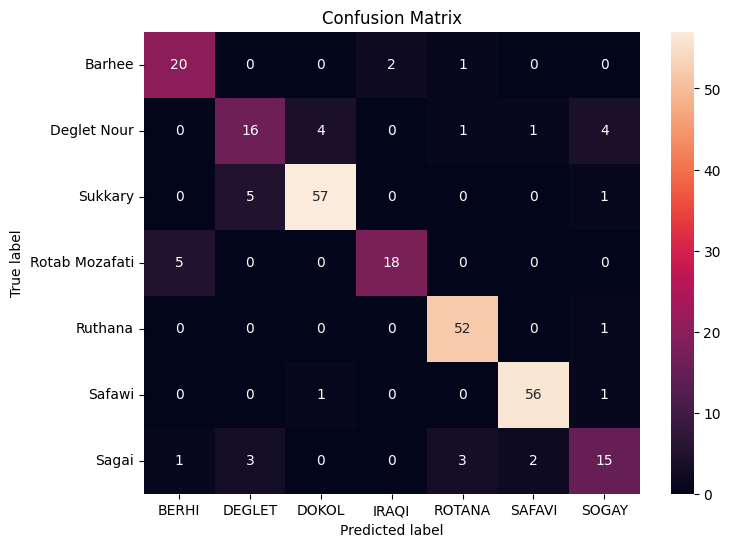

In [ ]:
# prompt: generate the classification report and confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Barhee', 'Deglet Nour', 'Sukkary', 'Rotab Mozafati', 'Ruthana', 'Safawi', 'Sagai'], columns=['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
# prompt: can you give me plot that descibe the performance of the all tested model in this dataset

accuracy_scores = [accuracy_knn, accuracy_svm, accuracy_rf, accuracy_dt, accuracy_nb, accuracy_lr, accuracy_bagged_ensemble, accuracy_xgb]
model_names = ['KNN', 'SVM', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'Bagged Ensemble', 'XGBoost']

plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


NameError: name 'accuracy_knn' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'
df = pd.read_excel(file_path)

# Separate features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode string labels to integer labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models for stacking
base_models_stacking = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', C=1.0, random_state=42)),
    ('xgboost', XGBClassifier(n_estimators=100, random_state=42))
]

# Initialize meta-model for stacking
meta_model_stacking = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Initialize stacking classifier
stacking_clf = StackingClassifier(estimators=base_models_stacking, final_estimator=meta_model_stacking)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the testing set for stacking
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate metrics for stacking
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking, average='weighted')
uac_stacking = recall_score(y_test, y_pred_stacking, average='macro')

print("Stacking Classifier Metrics:")
print("Accuracy:", accuracy_stacking)
print("F1-score:", f1_stacking)
print("UAC:", uac_stacking)

# Initialize base models for boosting
base_models_boosting = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', C=1.0, random_state=42)),
    ('xgboost', XGBClassifier(n_estimators=100, random_state=42))
]

# Train base models for boosting
for name, model in base_models_boosting:
    model.fit(X_train, y_train)

# Make predictions on the testing set for boosting
y_preds_boosting = np.column_stack([
    model.predict(X_test) for _, model in base_models_boosting
])

# Use a second-level model for boosting
meta_model_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
meta_model_boosting.fit(y_preds_boosting, y_test)

# Make predictions on the testing set using boosting
y_pred_boosting = meta_model_boosting.predict(y_preds_boosting)

# Calculate metrics for boosting
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
uac_boosting = recall_score(y_test, y_pred_boosting, average='macro')

print("\nBoosting Classifier Metrics:")
print("Accuracy:", accuracy_boosting)
print("F1-score:", f1_boosting)
print("UAC:", uac_boosting)

# Initialize base models for AdaBoost
base_models_adaboost = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', C=1.0, random_state=42)),
    ('xgboost', XGBClassifier(n_estimators=100, random_state=42))
]

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=None, n_estimators=50, random_state=42)

# Train AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

# Make predictions on the testing set for AdaBoost
y_pred_adaboost = adaboost_clf.predict(X_test)

# Calculate metrics for AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')
uac_adaboost = recall_score(y_test, y_pred_adaboost, average='macro')

print("\nAdaBoost Classifier Metrics:")
print("Accuracy:", accuracy_adaboost)
print("F1-score:", f1_adaboost)
print("UAC:", uac_adaboost)


ValueError: rotation must be 'vertical', 'horizontal' or a number, not horizantal

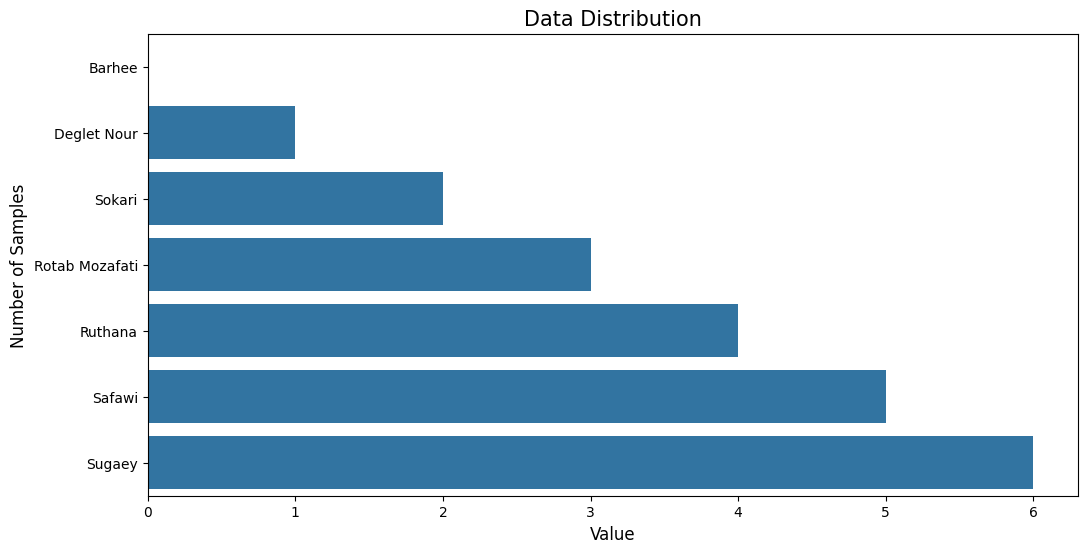

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_excel("/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

# Get the data distribution of the 'new_column' column
new_column_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(['Barhee', 'Deglet Nour', 'Sokari', 'Rotab Mozafati', 'Ruthana', 'Safawi','Sugaey'])
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Value', fontsize=12)
plt.title('Data Distribution', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

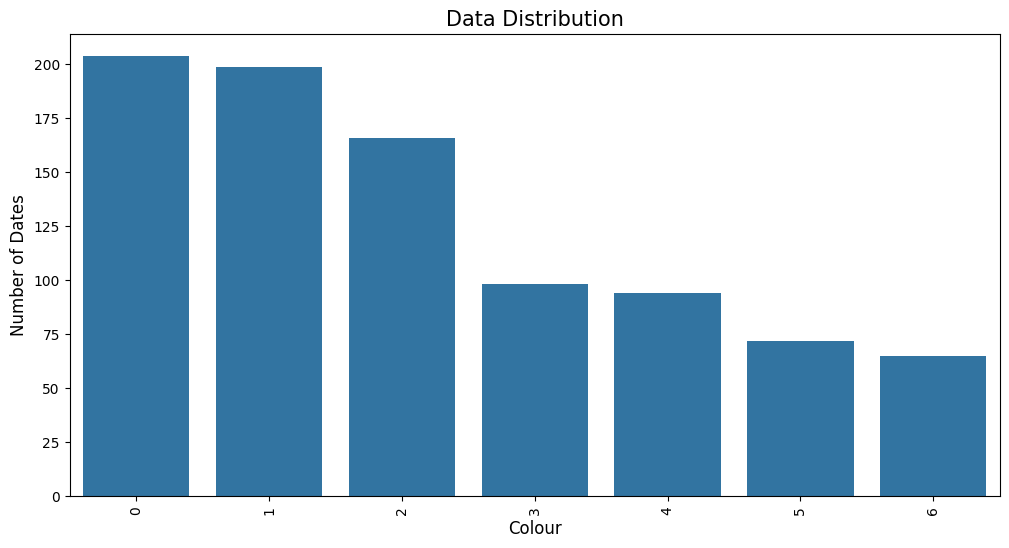

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_excel("/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

# Get the data distribution of the 'Colour' column
colour_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(colour_counts.values)
plt.ylabel('Number of Dates', fontsize=12)
plt.xlabel('Date varieties', fontsize=12)
plt.title('Data Distribution', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


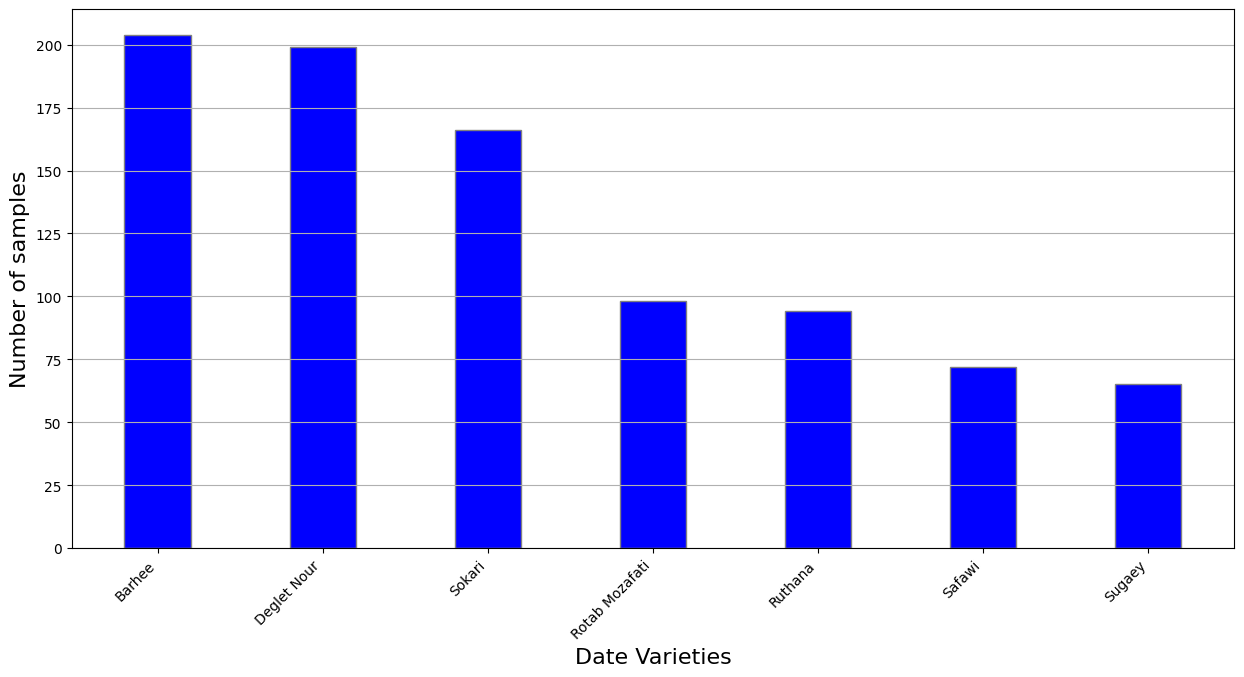

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the new dataset from an Excel file
new_data = pd.read_excel('/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

# Assuming the structure of the new DataFrame is similar
# Get the data from the DataFrame
data = new_data['Class'].value_counts()
labels = ['Barhee', 'Deglet Nour', 'Sokari', 'Rotab Mozafati', 'Ruthana', 'Safawi','Sugaey']
classes = new_data['Class'].tolist()
# Create the curve barplot
plt.figure(figsize=(15, 7))
for label, value, class_ in zip(labels, data, classes):
    color = 'blue'
    plt.bar(label, value, color=color, edgecolor='grey', width=0.4)

# Add title and labels

plt.xlabel('Date Varieties', fontsize=16)
plt.ylabel('Number of samples', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend²
#plt.legend(['Barhee', 'Deglet Nour', 'Sokari', 'Rotab Mozafati', 'Ruthana', 'Safawi','Sugaey'])  # Update legend labels based on your classes

# Add grid and show the plot
plt.grid(axis='y')
plt.show()
